# Seminar in Climatology

## Preparations
This section is only needed if you forked my GitHub account (thanks for that!). I am always try to work with an open sciences approach and 100% reproducibility in a very easy way. That means I provide the data and my code so that you can doublecheck my analysis. If something does not work, please contact me (patrick.bigler1@students.unibe.ch)

### Install the Libraries you Need
In this section, you will find all the libraries you need. The function will check if each library is already installed locally. If it is, the function will import the library. If it isn't, the function will automatically install the library. The second code chunk dynamically imports all the libraries and uses the same abbreviations as I did in this workflow.

### Access to the Data 
Here, you will read the data. To ensure a reproducible workflow, I have programmed a function. When you call the function, it will check if the data already exists. If it does, the function will read the data. If not, it will download the data from a Dropbox account into the 'data' folder and then read it (Note: This process only works if you have cloned or forked my GitHub repository on https://github.com/sundin01/Seminar_in_Climatology. If you do not use GitHub, then you have to change the path to your local data manually. But to ensure reproducability, you still have access to the data used in this workflow on https://www.dropbox.com/scl/fi/m9gsovef62qov5i9bx64n/ERA_data_july_heatwaves.nc?rlkey=lmybugkhkd9i5saba0we75cx8&st=tf08hs6r&dl=0 

In [412]:
# Function to ensure that you have installed all libraries you need

# You must have the importlib library if you installed python in a proper way because it is a standard library. 
import importlib

# Function to check whether you have a certain package already installed
def import_or_install(packages):
    # Loop to check for each library in the 'package'-vector
    for package in packages:
        # Try to import the library --> if it works, then the library is installed already
        try:
            importlib.import_module(package)
            print(f"{package} is already installed")
        # If the import fails, then we install the library first 
        except ImportError:
            print(f"{package} is not installed, installing now...")
            !pip install {package}
            print(f"{package} has been installed successfully")
    
# Libraries you will need for this workflow
packages = ['numpy', 'pandas', 'matplotlib', 'glob', 'pathlib', 'os.path', 'xarray', 'xarray.plot', 'cartopy.crs', 'cartopy.mpl.gridliner',
           'cartopy.feature', 'datetime', 'metpy.calc', 'metpy.units', 'os', 'urllib.request', 'math', 'metpy', 'xplot', 'zipfile']
# Call the function
import_or_install(packages)

numpy is already installed
pandas is already installed
matplotlib is already installed
glob is already installed
pathlib is already installed
os.path is already installed
xarray is already installed
xarray.plot is already installed
cartopy.crs is already installed
cartopy.mpl.gridliner is already installed
cartopy.feature is already installed
datetime is already installed
metpy.calc is already installed
metpy.units is already installed
os is already installed
urllib.request is already installed
math is already installed
metpy is already installed
xplot is already installed
zipfile is already installed


## Libraries
In this section, all libraries you need are imported to ensure that the workflow is reproducible. It may be that not all libraries are necessary becase it is my template for all my workflows in meteorology.  

In [413]:
# Here, we import all the libraries we use in our own way

# General libraries for file paths, data extraction, and some other things
from glob import glob
from pathlib import Path
from os.path import basename
# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import xarray.plot as xplot
import pandas as pd
# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
# Libraries to deal with maps and cordinates
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
# Library to deal with time
from datetime import datetime
# Libraries to plot meteorologic data
import metpy.calc as mpcalc
from metpy.units import units
# Library to handle paths, files and directories
import os
import math
import metpy.calc as mpcalc
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units

import xplot as plot

import urllib.request
import zipfile

## Read the Data
Description is missing

In [469]:
# Function to read the data (Pangu data will be preprocessed)

def load_or_download_data(folder_name, folder_path,reading_path, download_url):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        # If the folder doesn't exist, create it
        os.makedirs(folder_path)

    # Check if the folder exists
    file_path = os.path.join(folder_path, folder_name)
    # If yes --> read the data
    if os.path.exists(file_path):
        # Inform user if the data already exists
        print("Data found. Reading data from:", file_path)
        # Read the data and sort it by ascending latitude
        file_names = {"ERA_data": "ERA_data_july_heatwaves.nc",
                      "ERA_RH": "relative_humidity.nc",
                      "Pangu_data_20230702": "HW_EU_20230702.nc",
                      "Pangu_data_20230707": "HW_EU_20230707.nc",
                      "Pangu_data_20230711": "HW_EU_20230711.nc"}
        # Loop over all netCDF files
        datasets = {}
        for key, file_name in file_names.items():
            data_file_path = os.path.join(reading_path, file_name)
            if os.path.exists(data_file_path):
                data = xr.open_dataset(data_file_path)
                # Process Pangu data so that is similar to ERA-5
                if 'latitude' in data.coords:
                    # rename longitudes and latitudes
                    data = data.rename({'longitude': 'lon', 'latitude': 'lat'})
                    # change longitude from a 0-360 system into a -180 to 180 system
                    data = data.assign_coords(lon=((data.lon + 180) % 360) - 180)
                    # Sort the values along the longitude dimension in a ascending order
                    data = data.sortby('lon', ascending=True)
                # Sort by lat in ascending order
                data = data.sortby('lat', ascending=True)
                datasets[key] = data
    # If no --> download the data from a one drive account            
    else:
        print("Data not found. Downloading data from:", download_url)
        # Download the data from a url
        urllib.request.urlretrieve(download_url, file_path)
        print("Data downloaded successfully to:", file_path)
        # Do the same as in the function part above
        datasets = {}
        for key, file_name in file_names.items():
            data_file_path = os.path.join(reading_path, file_name)
            if os.path.exists(data_file_path):
                data = xr.open_dataset(data_file_path)
                if 'latitude' in data.coords:
                    data = data.rename({'longitude': 'lon', 'latitude': 'lat'})
                    data = data.assign_coords(lon=((data.lon + 180) % 360) - 180)
                    data = data.sortby('lon', ascending=True)
                data = data.sortby('lat', ascending=True)
                datasets[key] = data
    # Return a list of all data sets            
    return datasets

# Define all parameters you need for the function call
folder_name = 'heatwave_data/'
folder_path = '../data/'
reading_path = '../data/heatwave_data'
download_url = 'https://unibe365-my.sharepoint.com/:u:/g/personal/patrick_bigler1_students_unibe_ch/ES70v5csW7tJhgsXM5niQgcBk8hlpVQwlgjuU-3gS9OUxQ?e=E9EAlR'

# Function call
datasets = load_or_download_data(folder_name, folder_path, reading_path, download_url)

# Access the datasets
ERA_data = datasets.get("ERA_data")
ERA_RH = datasets.get("ERA_RH")
Pangu_data_20230702 = datasets.get("Pangu_data_20230702")
Pangu_data_20230707 = datasets.get("Pangu_data_20230707")
Pangu_data_20230711 = datasets.get("Pangu_data_20230711")

Data found. Reading data from: ../data/heatwave_data/


## Time Convertion
Description is missing

In [415]:
# Convert timedelta into datetime so that you can use the dates in the data in a easy way

# Function to convert time delta to datetime array
def convert_time_delta_to_datetime(data, base_date):
    # Read the dimension "step"
    delta_ns = data['step']
    # Extract the values from the dimension step
    step_values = delta_ns.values
    # Convert nanoseconds into seconds
    seconds = step_values / 1e9
    # Create a new, empty list
    converted_dates = []
    # Create a for loop to iterate over all timesteps
    for second in seconds:
        # Convert the time delta in base date + number of seconds
        converted_dates.append(base_date + np.timedelta64(int(second), 's'))
    converted_dates_array = np.array(converted_dates, dtype='datetime64[ns]')
    data = data.assign_coords(step=('step', converted_dates_array))
    return data

# Read and process Pangu 10-day forecast data
base_date_10_days = np.datetime64('2023-07-02T12:00:00')
Pangu_data_20230702 = convert_time_delta_to_datetime(Pangu_data_20230702, base_date_10_days)

# Read and process Pangu 5-day forecast data
base_date_5_days = np.datetime64('2023-07-07T12:00:00')
Pangu_data_20230707 = convert_time_delta_to_datetime(Pangu_data_20230707, base_date_5_days)

# Read and process Pangu 1-day forecast data
base_date_1_day = np.datetime64('2023-07-11T12:00:00')
Pangu_data_20230711 = convert_time_delta_to_datetime(Pangu_data_20230711, base_date_1_day)

# Analysis With ERA-5 Reanalysis Data

In [470]:
# ERA-5 relative humidity
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
ERA_RH = ERA_RH.sel(time = '2023-07-12T18:00:00', lat = lat_range)
ERA_RH = ERA_RH['r']

# Relative Humidity

 ### Calculate the saturation vapor pressure using temperature (according to Bolton (1980))

In [417]:
# Calculate saturation vapor pressure
# Extract ERA-Data for a certain time
ERA_temp = ERA_data['t2m'].sel(time = '2023-07-12T18:00:00')
# Use Metpy to attach the unit to the values
temperature_kelvin = ERA_temp.values * units.kelvin
# Convert the values from Kelvin into degree Celsius
temperature_celsius = temperature_kelvin.to(units.celsius)

# Apply metpy to calculate the saturation vapor pressure
e_s = mpcalc.saturation_vapor_pressure(temperature_celsius)
# Convert the result from Pascal into hecto-Pascal
e_s = e_s.to(units('hPa'))

### Calculate the vapor pressure using specific humidity and pressure

In [418]:
# Calculate vapor pressure
specific_humidity = ERA_data['q'].sel(level=850, time = '2023-07-12T18:00:00')
# Use Metpy to attach the unit to the values kg/kg
specific_kg_kg = specific_humidity.values * units('kg/kg') 
# Convert the values from kg/kg into g/kg
specific_g_kg = specific_kg_kg.to(units('g/kg'))
# Calculate mixing ratio from specific humidity
mixing_ratio = mpcalc.mixing_ratio_from_specific_humidity(specific_g_kg)

pressure = ERA_data['msl'].sel(time = '2023-07-12T18:00:00')
pressure_Pa = pressure.values * units.pascal
pressure_hPa = pressure_Pa.to(units('hPa'))
# Calculate vapor pressure from pressure and mixing ratio
e = mpcalc.vapor_pressure(pressure_hPa, mixing_ratio)

In [419]:
# Calculate relative humidity
relative_humidity = (e/e_s)*100
relative_humidity = relative_humidity*units.percent
# Attach coordinates from the original data
relative_humidity = xr.DataArray(relative_humidity.magnitude, coords=ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').coords, dims=ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').dims)

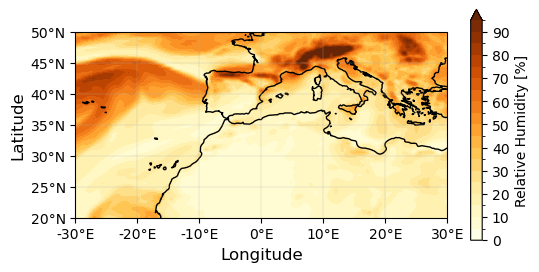

In [420]:
# Plot relative humidity
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(0, 100, 5)

RH = relative_humidity.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(RH, ax=ax, cmap='YlOrBr', levels=levels, cbar_kwargs={'label': 'Relative Humidity [%]'})
# Add coastlines

ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
plt.savefig('../analysis/Absolute_Values/Relative_Humidity/ERA_Estimated_RM.pdf')

# Show the plot
plt.show()

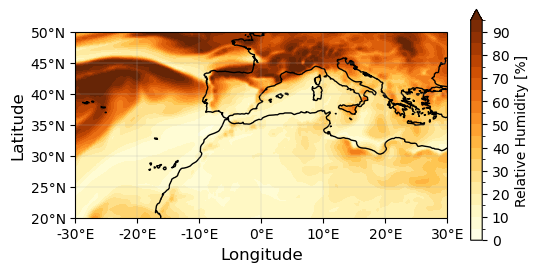

In [421]:
# Plot ERA-5 relative humidity
# Select a specific time slice (for example, the first time step)
RH = ERA_RH
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(0,100, 5)
# Plot the relative humidity for the selected latitude and longitude range
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(RH.sel(lat=lat_range, lon=lon_range), ax=ax, cmap='YlOrBr', levels=levels, cbar_kwargs={'label': 'Relative Humidity [%]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth=0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

plt.savefig('../analysis/Absolute_Values/Relative_Humidity/ERA_Calculated_RM.pdf')
# Show the plot
plt.show()


# Heat Index

In [422]:
# Calculate heat index with estimated relative humidity

# Convert temperature into degree fahrenheit
temperature_fahrenheit = temperature_kelvin.to(units.fahrenheit)
# Function call to calculate the heat index according to Steadman
heat_index_estimated = mpcalc.heat_index(temperature_fahrenheit, relative_humidity, mask_undefined=False)
heat_index_estimated = xr.DataArray(heat_index_estimated.magnitude, coords = ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').coords, dims = ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').dims)/100

In [423]:
# Calculate heat index with ERA-5 relative humidity
# Use Metpy to attach the unit to the values
heat_index_ERA = mpcalc.heat_index(temperature_fahrenheit, ERA_RH, mask_undefined=False)
heat_index_ERA = xr.DataArray(heat_index_ERA.magnitude, coords=ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').coords, dims=ERA_data['t2m'].sel(time = '2023-07-12T18:00:00').dims)

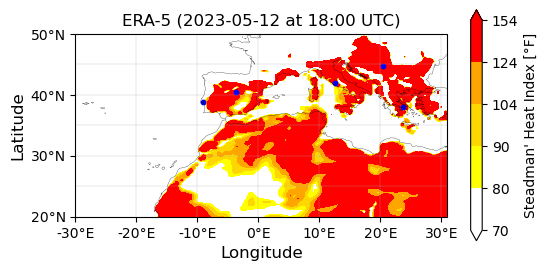

In [424]:
# Plot the estimated Heat Index 

#
colors = ['white', 'yellow', 'gold', 'orange', 'red']
bounds = [70, 80, 90, 104, 124, 154]
cmap = mcolors.ListedColormap(colors)

# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 31)
lat_range = slice(20, 51)
levels = np.arange(0, 500, 50)

HI = heat_index_estimated.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(HI, ax=ax, cmap=cmap, levels=bounds, cbar_kwargs={'label': "Steadman' Heat Index [°F]"})
# Add coastlines
    
ax.coastlines(linewidth=0.2)
# Draw gridlines but no labels (we will do that later using a for loop)
ax.gridlines(draw_labels=False, linewidth=0.2)
points = [(38.736946, -9.142685), (40.416775, -3.703790), (41.902782, 12.496366), (44.787197, 20.457273), (37.983810, 23.727539)]  
for lon, lat in points:
    ax.scatter(lat, lon, color='blue', marker='o', label='Points', s=10)

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 10))
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 10)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10))
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)
# we do not want any title because we will be using captions in the report
ax.set_title('ERA-5 (2023-05-12 at 18:00 UTC)')

# Save the plot as a PDF file
plt.savefig('../analysis/Heat_Index/ERA_Estimated_Heat_Index.pdf')

# Show the plot
plt.show()

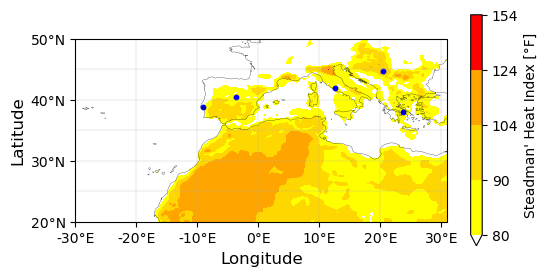

In [425]:
# Plot the estimated Heat Index 

#
colors = ['white', 'yellow', 'gold', 'orange', 'red']
bounds = [ 80, 90, 104, 124, 154]
cmap = mcolors.ListedColormap(colors)

# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 31)
lat_range = slice(20, 51)

HI = heat_index_ERA.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(HI, ax=ax, cmap=cmap, levels=bounds, cbar_kwargs={'label': "Steadman' Heat Index [°F]"})
# Add coastlines
    
ax.coastlines(linewidth=0.2)
# Draw gridlines but no labels (we will do that later using a for loop)
ax.gridlines(draw_labels=False, linewidth=0.2)
points = [(38.736946, -9.142685), (40.416775, -3.703790), (41.902782, 12.496366), (44.787197, 20.457273), (37.983810, 23.727539)]  
for lon, lat in points:
    ax.scatter(lat, lon, color='blue', marker='o', label='Points', s=10)

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 10))
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 10)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10))
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
plt.savefig('../analysis/Heat_Index/ERA_Calculated_Heat_Index.pdf')

# Show the plot
plt.show()

# Wind

In [426]:
## compute surface wind speed from u and v
ERA_data = ERA_data.assign(wind_speed = lambda ERA_data: (ERA_data.u**2 + ERA_data.v**2)**0.5 )

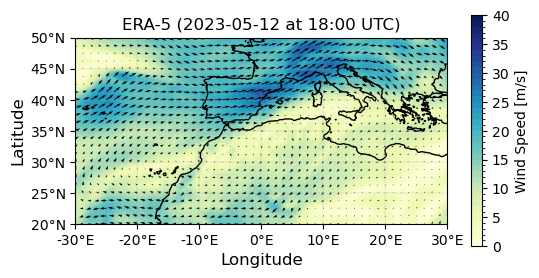

In [427]:
map_projection = ccrs.PlateCarree()

# Define the area of interest and levels for wind speed
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
V_levels = np.arange(0, 41, 1)

# Create a figure and axis with the specified projection
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=map_projection)

# Plotting wind speed contours
ERA_data.wind_speed.sel(time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, level=500).squeeze().plot.contourf(
    ax=ax, transform=map_projection, levels=V_levels, vmin=0, vmax=30,
    cmap='YlGnBu', cbar_kwargs=dict(label='Wind Speed [m/s]'))

# Reduce the density of wind vectors by selecting every nth point
n = 5  # Adjust this value as needed
wind_data = ERA_data.sel(time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, level=500)
u = wind_data['u'][::n, ::n]
v = wind_data['v'][::n, ::n]
lon = wind_data['lon'][::n]
lat = wind_data['lat'][::n]

# Plotting wind vectors
ax.quiver(lon, lat, u, v, transform=map_projection, scale=1000)  # Adjust the scale as needed

# Add coastlines and gridlines
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.gridlines(draw_labels=False, linewidth=0.2)

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)

# Setting the title
#valid_time = '2023-07-12 at 18:00:00 UTC'
#ax.set_title('')  # to suppress xarray auto-title
#ax.set_title(f'Valid time: {valid_time}', loc='right')
#ax.set_title('ERA5 500 hPa wind', loc='left')
ax.set_title('ERA-5 (2023-05-12 at 18:00 UTC)')
# Save the plot as a PDF file
plt.savefig('../analysis/Absolute_Values/Wind/wind500.pdf')

# Show the plot
plt.show()

# ERA-5: Analyisis
In this part you will analysis the ERA-5 data set. This is very important because it is the baseline for all further analyiiss especially beacuse we want to compare the data with Pangu-Wether forecast data. 

## ERA-5: 2-Meter Air Temperature
First, we generate a plot with absolute values. Secondly, we plot an overview about the temporal deviation. You can adapt the code if you want to change the timesteps.

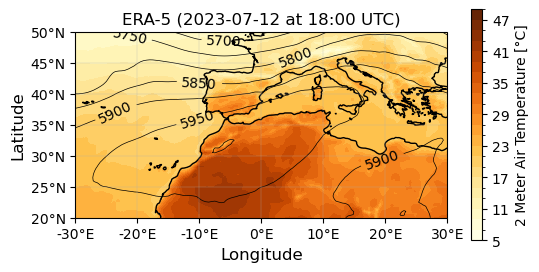

In [428]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 51, 2)

# Read the 2-meter air temperature at a specific date and convert to °C
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range) - 273.15

# Select the geopotential height data for the specified longitude and latitude ranges
geopotential_height = ERA_data.z.sel(time='2023-07-12T18:00:00', level=500, lon=lon_range, lat=lat_range) / 9.81

# Apply latitude weights to the temperature data
latitudes = ERA_t2m.lat
lat_weights = np.cos(np.deg2rad(latitudes))
t2m_weighted = ERA_t2m * lat_weights

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})

# Use contourf and define some parameters
cbar_kwargs = {'label': '2 Meter Air Temperature [°C]'}
t2m_weighted.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='YlOrBr', levels=levels, cbar_kwargs=cbar_kwargs)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=False, linewidth=0.2)

# Plot geopotential height as contour lines
contour = ax.contour(geopotential_height.lon, geopotential_height.lat, geopotential_height, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
ax.clabel(contour, inline=True, fmt='%1.0f')

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)

# Set the title
ax.set_title('ERA-5 (2023-07-12 at 18:00 UTC)')

# Save the plot as a PDF file (uncomment if needed)
plt.savefig('../analysis/Absolute_Values/Temperature/ERA5_1800.pdf')

# Show the plot
plt.show()

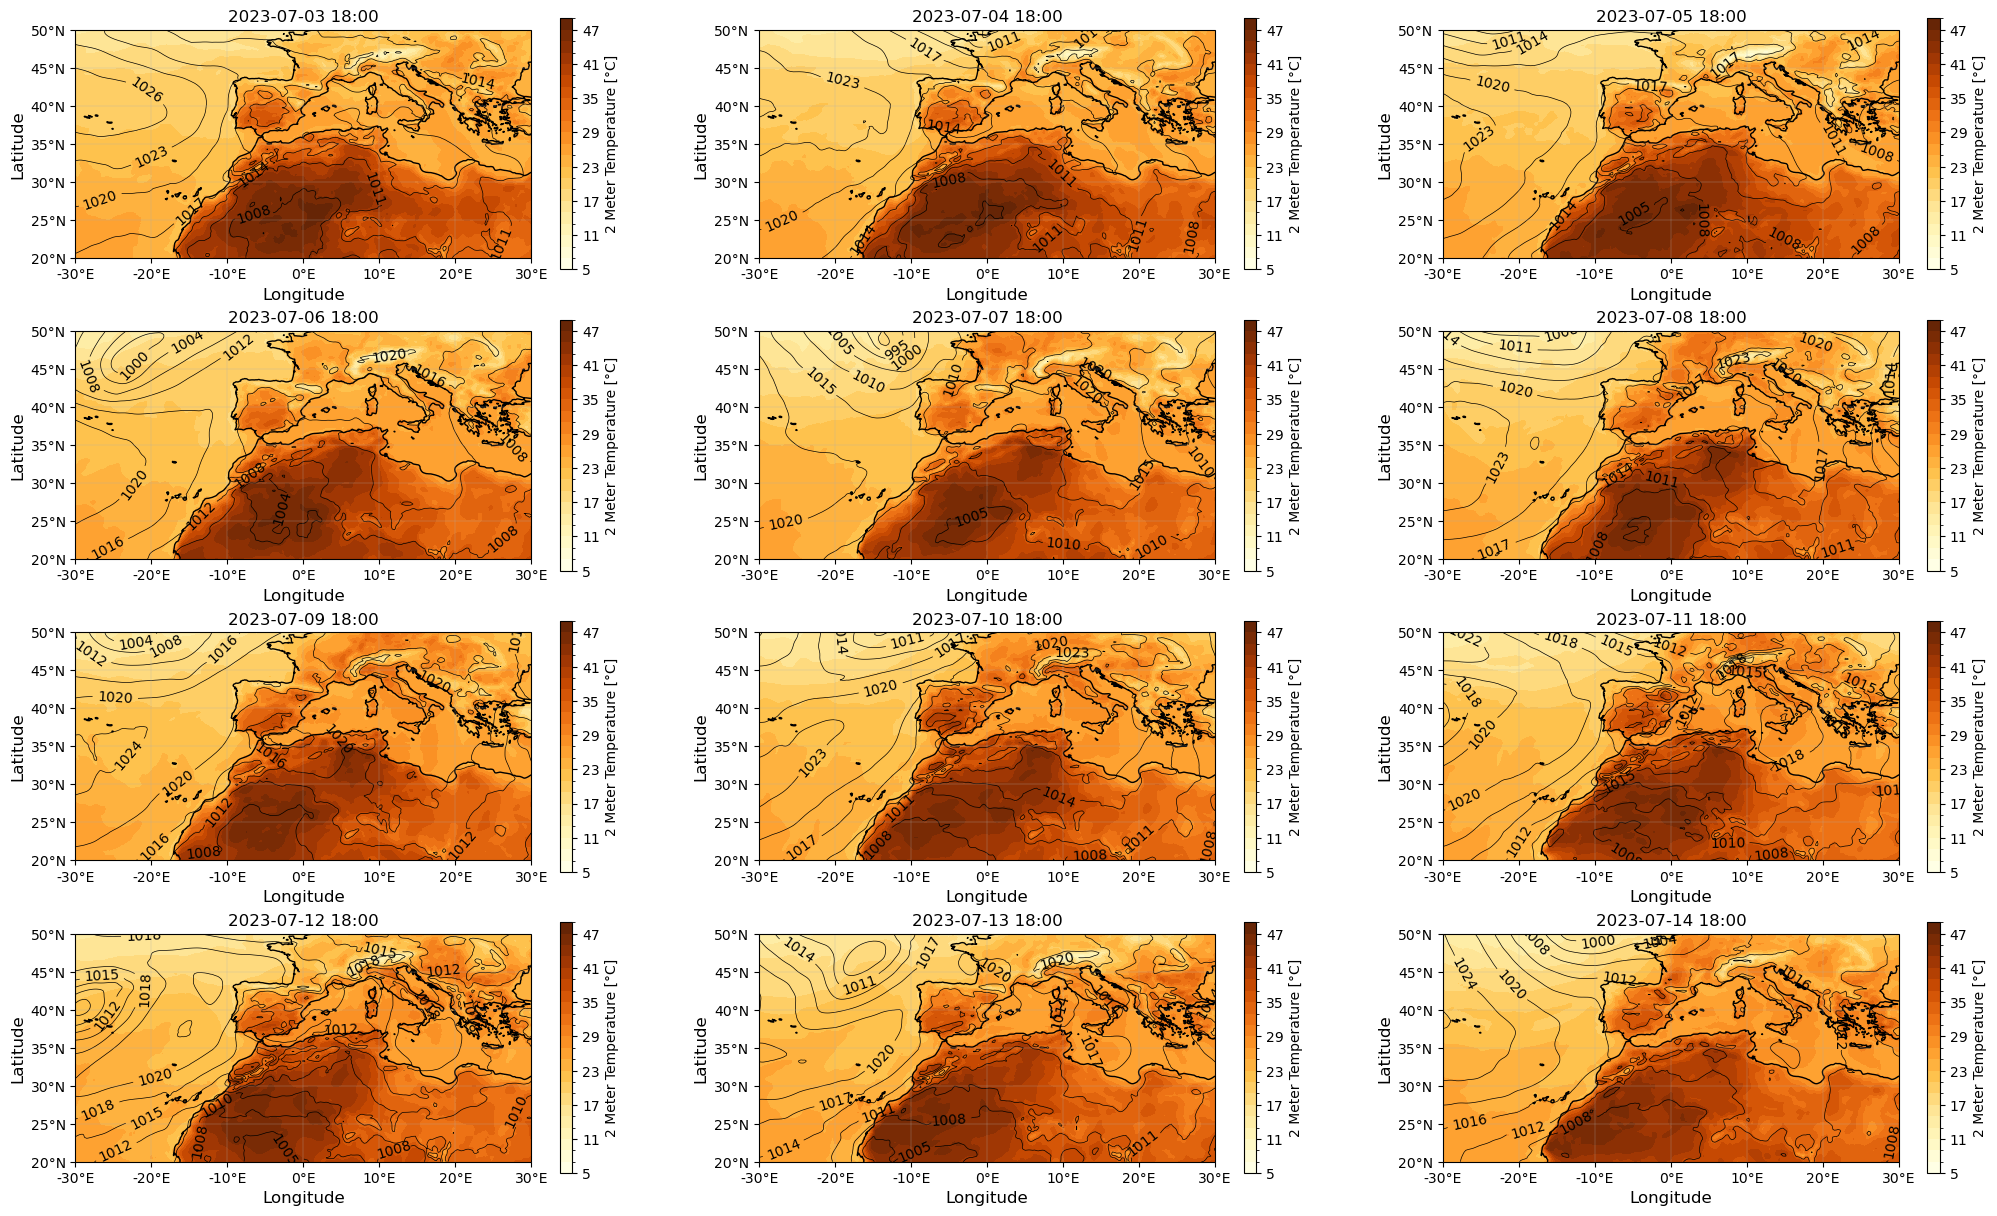

In [429]:
# Overview About the 2 Meter Air Temperature Using ERA-5 Data
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 51, 2)

surface_pressure = ERA_data.msl.sel(lon=lon_range, lat=lat_range) / 100

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced['time'].isel(time=slice(11, 69, 4))

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2m_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    formatted_time = rounded_time.dt.strftime('%Y-%m-%d %H:%M')  # Format the timestamp
    xplot.contourf(plot_data, ax=ax, cmap='YlOrBr', levels=levels, cbar_kwargs={'label': '2 Meter Temperature [°C]'})

    # Plot the sea level pressure as isobaric lines (contours)
    surface_pressure_time = surface_pressure.sel(time=t2m_selected_timesteps[i])
    contour = ax.contour(surface_pressure_time.lon, surface_pressure_time.lat, surface_pressure_time, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
    ax.clabel(contour, inline=True, fmt='%1.0f')
    
    ax.coastlines()
    ax.gridlines(draw_labels=False, linewidth=0.2)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(formatted_time.values, fontsize=12)  # Set the title with formatted time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

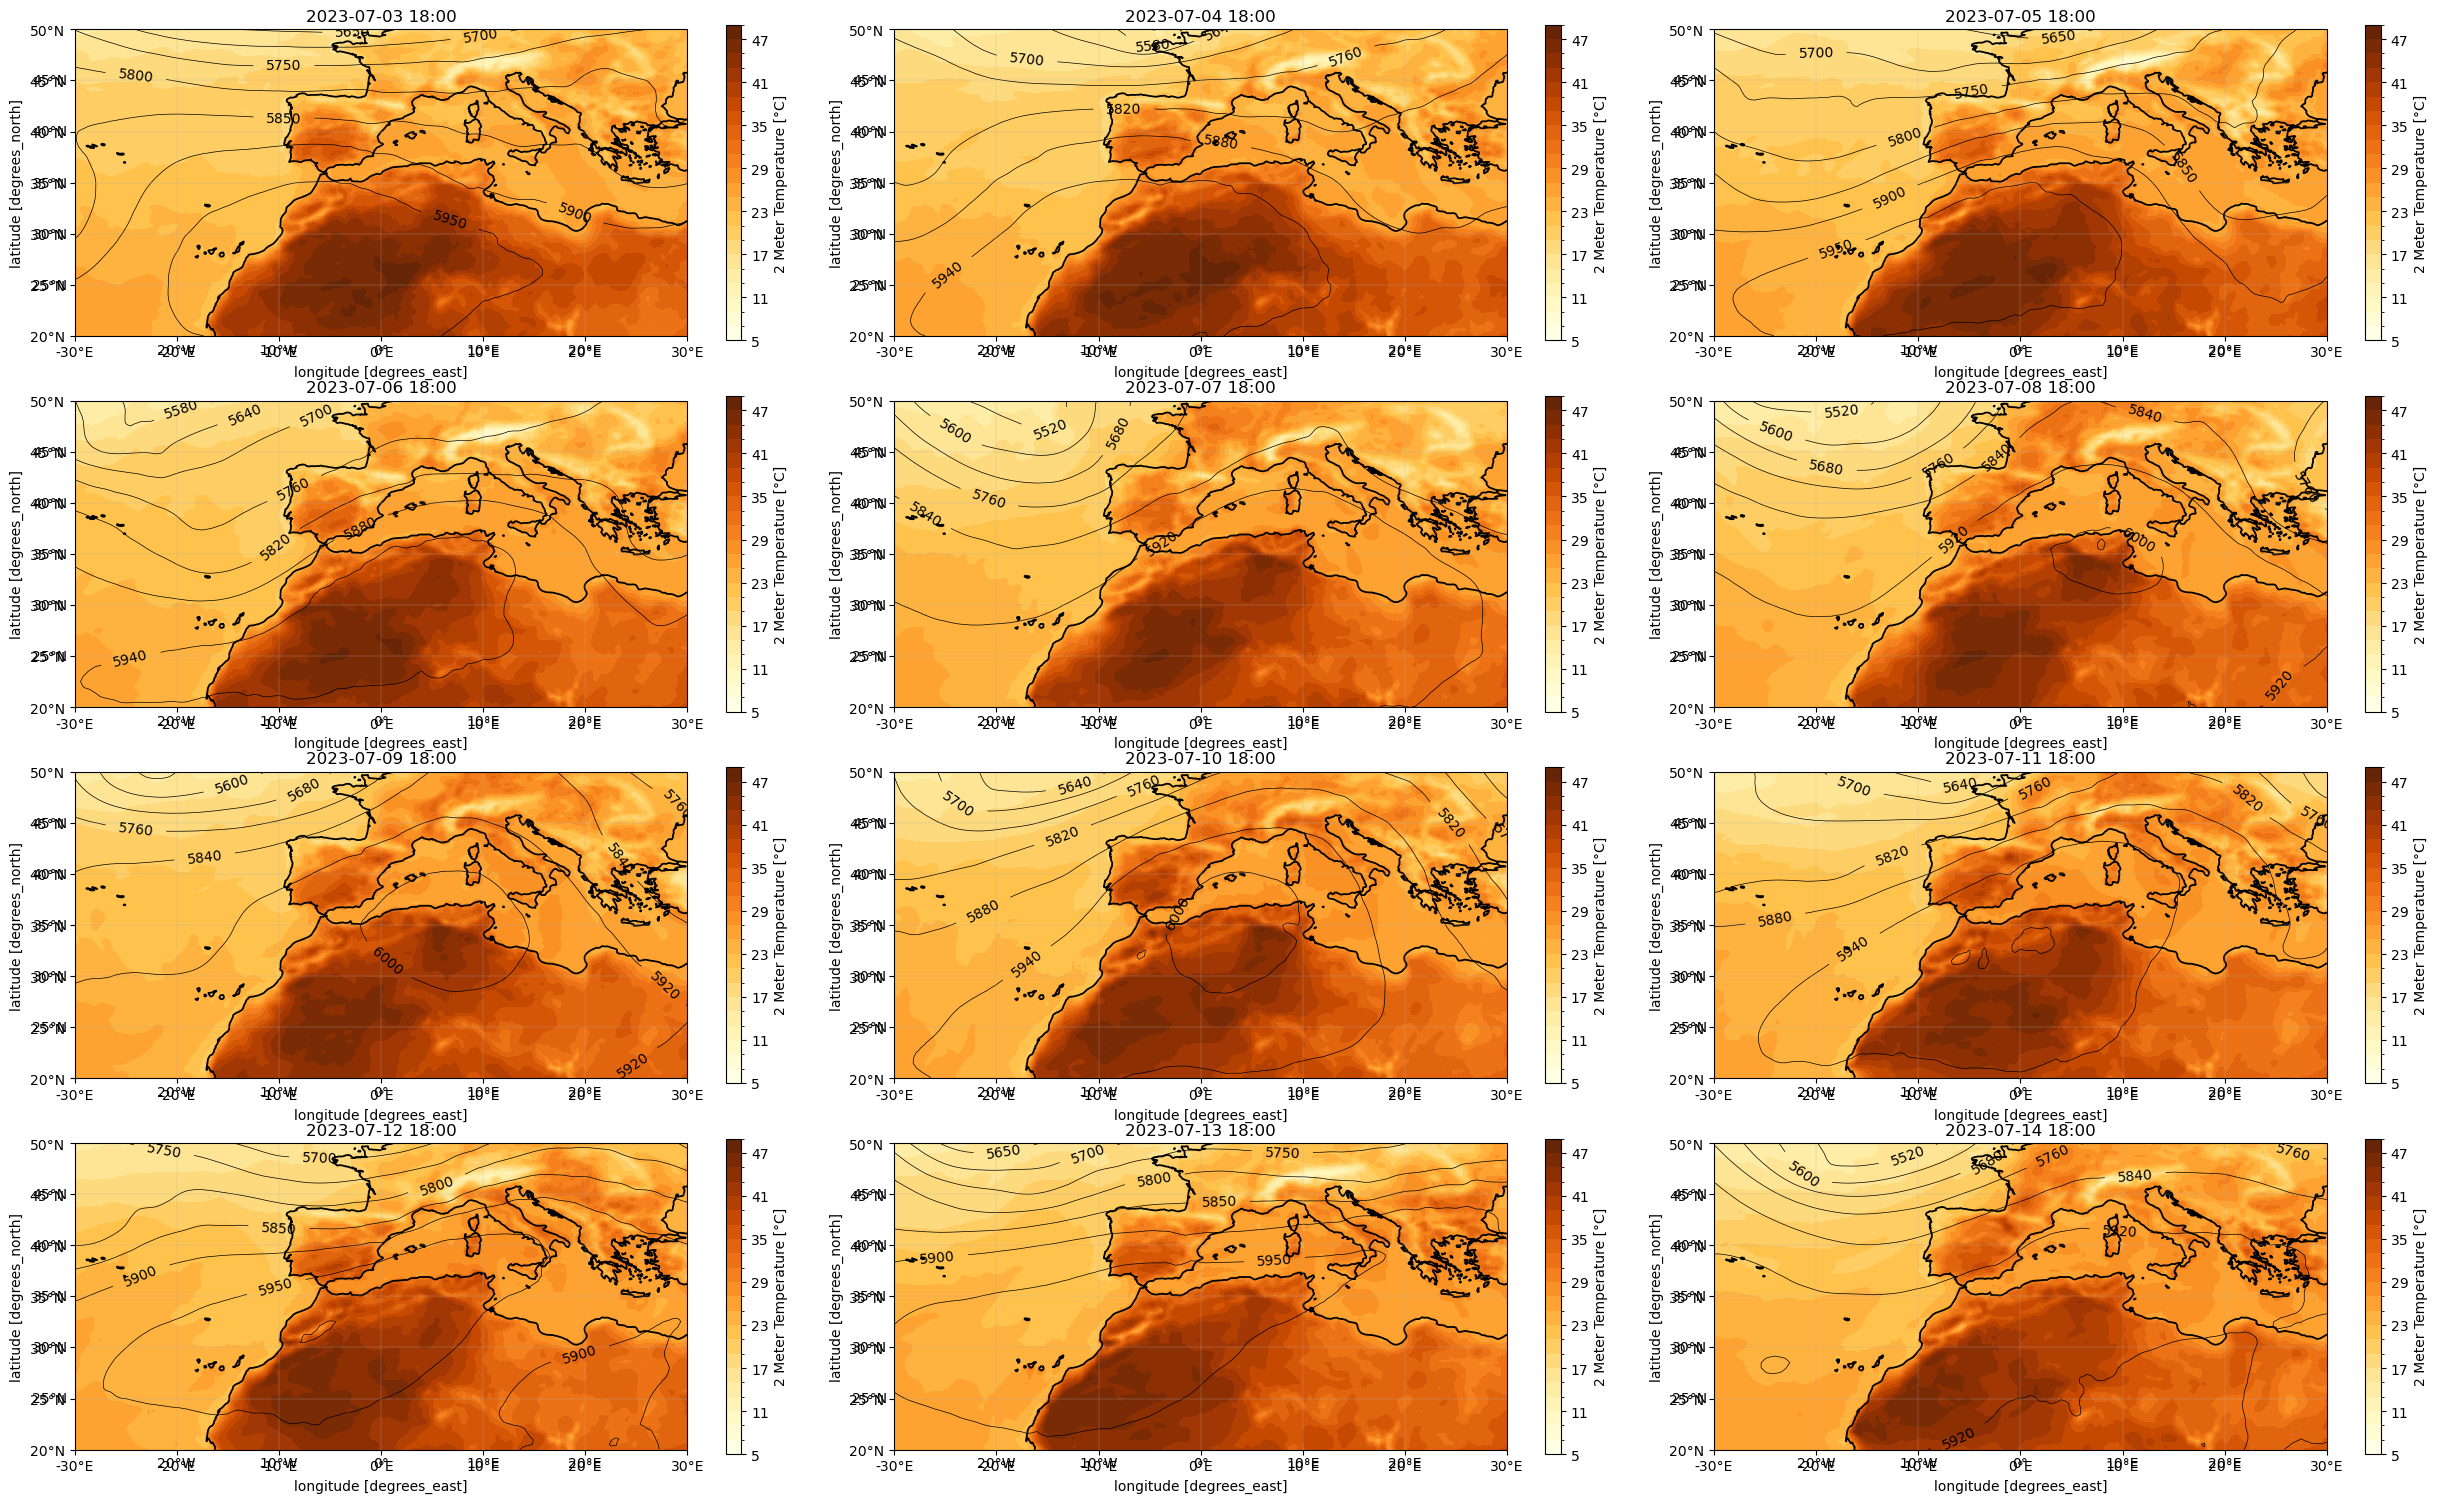

In [430]:
# Define the area of interest and the levels for the color bar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 51, 2)

# Select the mean sea level pressure data for the specified longitude and latitude ranges
geopotential_height = ERA_data.z.sel(level = 500, lon=lon_range, lat=lat_range) / 9.81
# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range) - 273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced['time'].isel(time=slice(11, 69, 4))

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    # Select data for the current timestep
    plot_data = t2m_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    formatted_time = rounded_time.dt.strftime('%Y-%m-%d %H:%M')  # Format the timestamp
    
    # Plot the 2-meter temperature data
    im = plot_data.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='YlOrBr', levels=levels, cbar_kwargs={'label': '2 Meter Temperature [°C]'})

    geopotential_height_time = geopotential_height.sel(time=t2m_selected_timesteps[i])
    contour = ax.contour(geopotential_height_time.lon, geopotential_height_time.lat, geopotential_height_time, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
    ax.clabel(contour, inline=True, fmt='%1.0f')
    
    # Add coastlines and gridlines
    ax.coastlines(linewidth = 1.3)
    gl = ax.gridlines(draw_labels=True, linewidth=0.2)
    gl.top_labels = gl.right_labels = False  # Disable top and right labels
    gl.xlabel_style = {'fontsize': 10}
    gl.ylabel_style = {'fontsize': 10}
    
    # Set explicit ticks and labels for the axes
    ax.set_xticks(np.arange(-30, 31, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(20, 51, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}°E'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}°N'))
    
    # Set the title with formatted time values
    ax.set_title(formatted_time.values, fontsize=12)

# Adjust layout and save the plot as a PDF file
plt.tight_layout()
plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

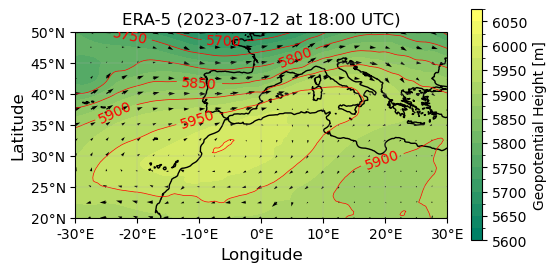

In [431]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5600, 6100, 25)

# Read the 2-meter air temperature at a specific date and convert to °C
ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range)/9.81

# Select the geopotential height data for the specified longitude and latitude ranges
geopotential_height = ERA_data.z.sel(time='2023-07-12T18:00:00', level=500, lon=lon_range, lat=lat_range) / 9.81

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})

# Use contourf and define some parameters
cbar_kwargs = {'label': 'Geopotential Height [m]'}
geopotential_height.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='summer', levels=levels, cbar_kwargs=cbar_kwargs)

# Reduce the density of wind vectors by selecting every nth point
n = 10  # Adjust this value as needed
wind_data = ERA_data.sel(time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, level=500)
u = wind_data['u'][::n, ::n]
v = wind_data['v'][::n, ::n]
lon = wind_data['lon'][::n]
lat = wind_data['lat'][::n]

# Plotting wind vectors
ax.quiver(lon, lat, u, v, transform=map_projection, scale=1000)  # Adjust the scale as needed

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=False, linewidth=0.2)

# Plot geopotential height as contour lines
contour = ax.contour(geopotential_height.lon, geopotential_height.lat, geopotential_height, colors='red', linewidths=0.5, transform=ccrs.PlateCarree())
ax.clabel(contour, inline=True, fmt='%1.0f')

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)

# Set the title
ax.set_title('ERA-5 (2023-07-12 at 18:00 UTC)')

# Save the plot as a PDF file (uncomment if needed)
plt.savefig('../analysis/Absolute_Values/Geopotential_Height/ERA5_1800.pdf')

# Show the plot
plt.show()

## ERA-5: Geopotential Height
First, we generate a plot with absolute values. Secondly, we plot an overview about the temporal deviation. You can adapt the code if you want to change the timesteps.

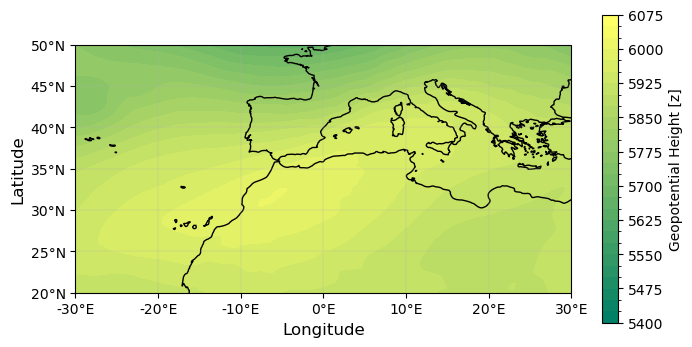

In [432]:
# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 25)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-12T18:00:00', lon=lon_range, lat=lat_range)/9.81
# remove "#" to use this line --> Reference for the Geopotential Height at Midnight
#ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)/9.81

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(ERA_z_500 , ax=ax, cmap='summer', levels=levels, cbar_kwargs={'label': 'Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

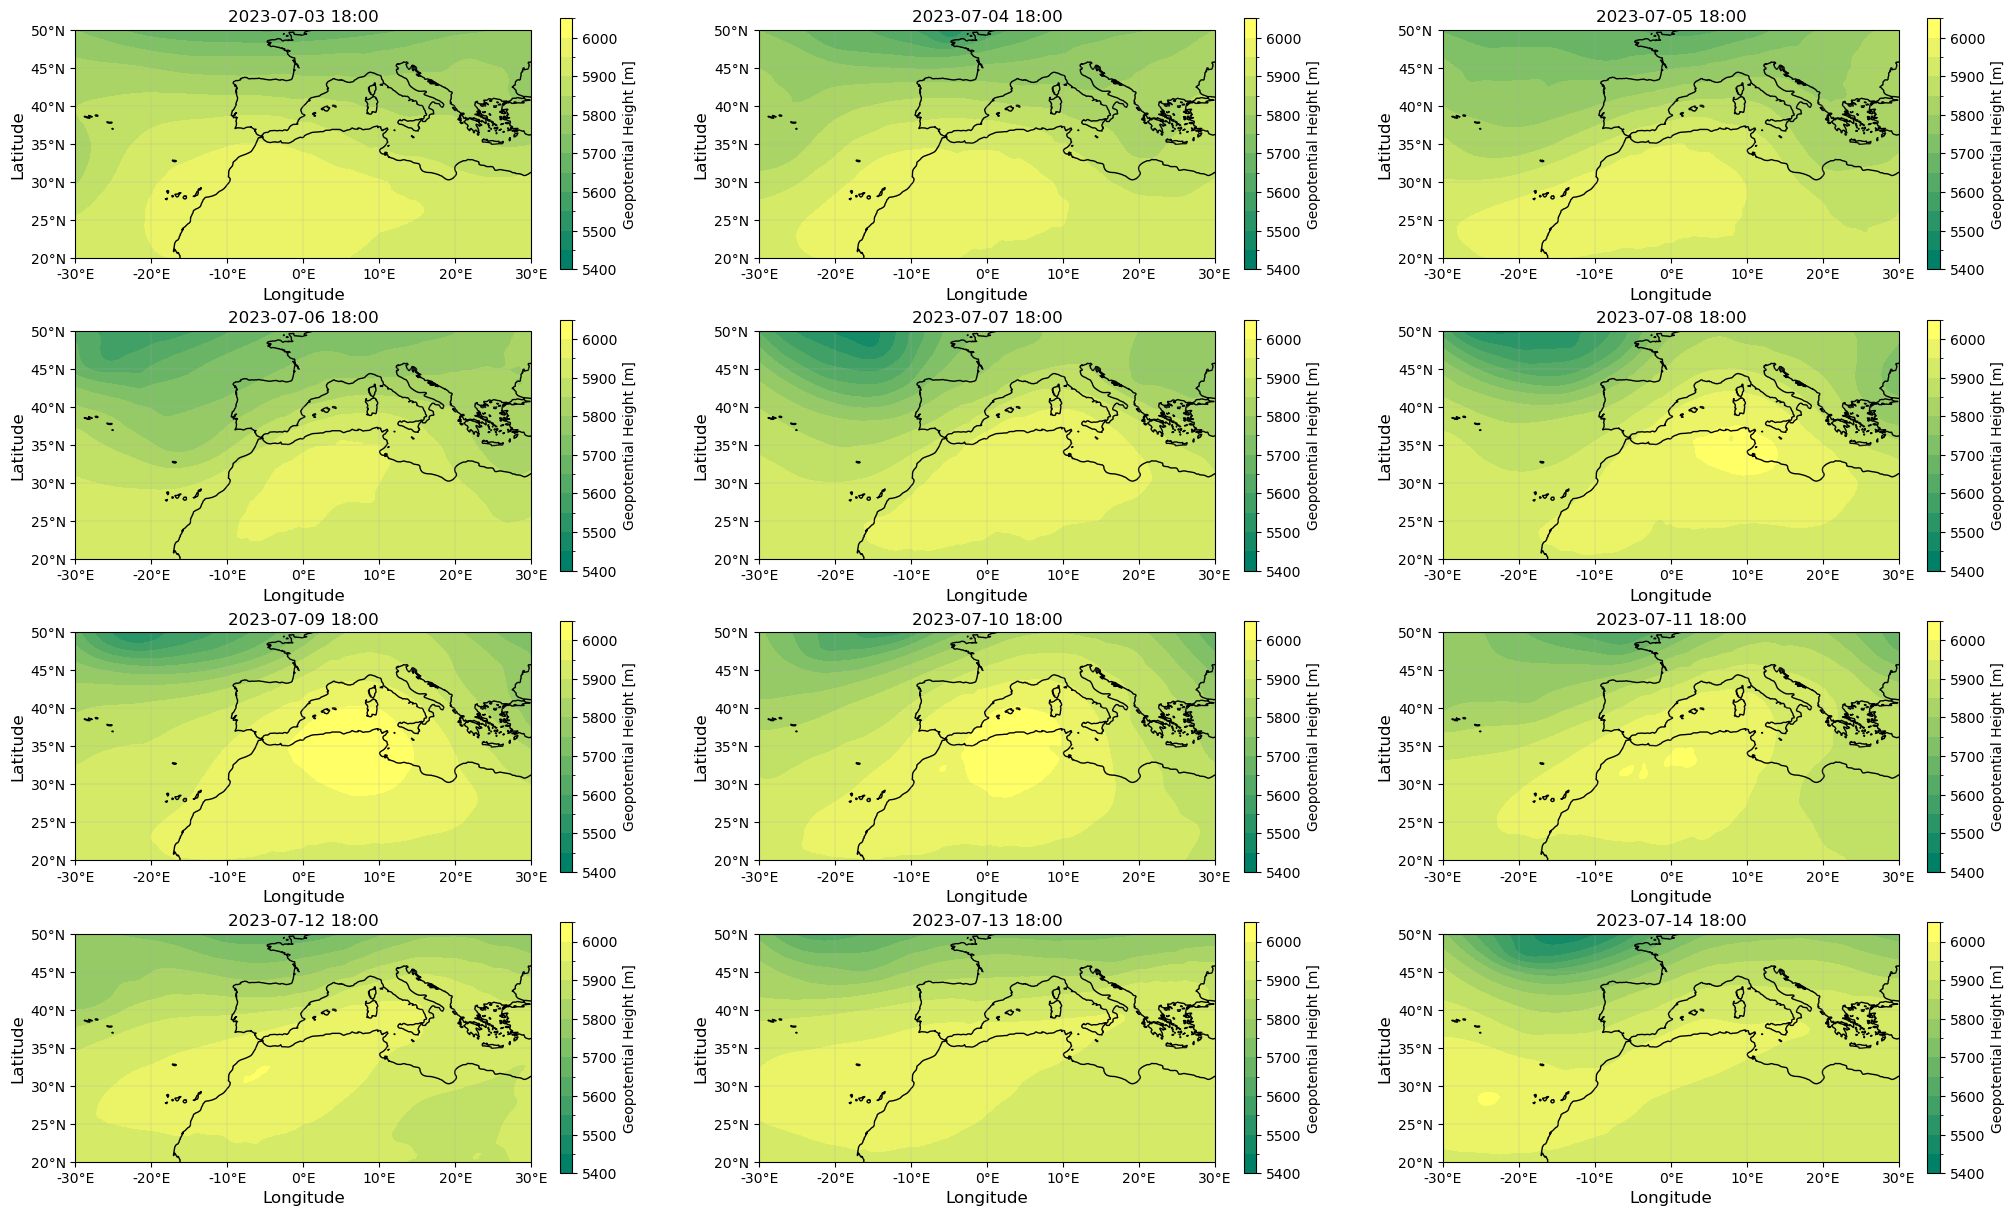

In [433]:
# Overview About the Geopotential Height Using ERA-5 Data
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
z_sliced = ERA_data['z'].sel(level = 500, lon=lon_range, lat=lat_range)/9.81

# Select specific timesteps [0 - 68]
z_selected_timesteps = z_sliced['time'].isel(time=slice(11, 69, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = z_sliced.sel(time=z_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    formatted_time = rounded_time.dt.strftime('%Y-%m-%d %H:%M')  # Format the timestamp as 'YYYY-MM-DD HH:MM'
    xplot.contourf(plot_data, ax=ax, cmap='summer', levels=levels, cbar_kwargs={'label': 'Geopotential Height [m]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False, linewidth = 0.2)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(formatted_time.values, fontsize=12)  # Set the title with formatted time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

# Analyisis With Pangu-Weather Forecast Data

## Read the Pangu-Weather Forecast Data

# Relative Humidity

## Calculate the Saturation Vapor Pressure

In [434]:
# Calculate saturation vapor pressure
# Extract ERA-Data for a certain time
Pangu_temp = Pangu_data_20230702['t2'].sel(step = '2023-07-12T18:00:00')
# Use Metpy to attach the unit to the values
temperature_kelvin = Pangu_temp.values * units.kelvin
# Convert the values from Kelvin into degree Celsius
temperature_celsius = temperature_kelvin.to(units.celsius)

# Apply metpy to calculate the saturation vapor pressure
e_s = mpcalc.saturation_vapor_pressure(temperature_celsius)
# Convert the result from Pascal into hecto-Pascal
e_s = e_s.to(units('hPa'))

## Calculate the Vapor Pressure

In [435]:
# Calculate vapor pressure
specific_humidity = Pangu_data_20230702['q'].sel(isobaricInhPa=850, step = '2023-07-12T18:00:00')
# Use Metpy to attach the unit to the values kg/kg
specific_kg_kg = specific_humidity.values * units('kg/kg') 
# Convert the values from kg/kg into g/kg
specific_g_kg = specific_kg_kg.to(units('g/kg'))
# Calculate mixing ratio from specific humidity
mixing_ratio = mpcalc.mixing_ratio_from_specific_humidity(specific_g_kg)

pressure = Pangu_data_20230702['msl'].sel(step= '2023-07-12T18:00:00')
pressure_Pa = pressure.values * units.pascal
pressure_hPa = pressure_Pa.to(units('hPa'))
# Calculate vapor pressure from pressure and mixing ratio
e = mpcalc.vapor_pressure(pressure_hPa, mixing_ratio)

In [436]:
# Calculate relative humidity
relative_humidity = (e/e_s)*100
relative_humidity = relative_humidity*units.percent
# Attach coordinates from the original data
relative_humidity = xr.DataArray(relative_humidity.magnitude, 
                                 coords=Pangu_data_20230702['t2'].sel(step = '2023-07-12T18:00:00').coords, 
                                 dims=Pangu_data_20230702['t2'].sel(step = '2023-07-12T18:00:00').dims)

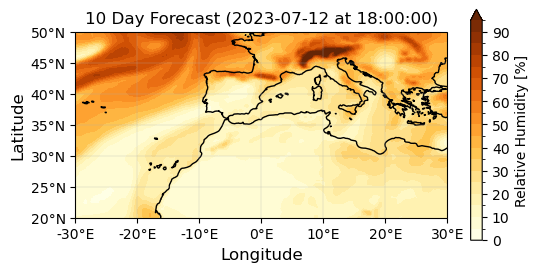

In [437]:
# Plot relative humidity
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(0, 100, 5)

RH = relative_humidity.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(RH, ax=ax, cmap='YlOrBr', levels=levels, cbar_kwargs={'label': 'Relative Humidity [%]'})
# Add coastlines

ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)
ax.set_title('10 Day Forecast (2023-07-12 at 18:00:00)')
# Save the plot as a PDF file
plt.savefig('../analysis/Absolute_Values/Relative_Humidity/Pangu10_Estimated_RH.pdf')

# Show the plot
plt.show()

# Heat Index

In [438]:
# Calculate heat index with estimated relative humidity

# Convert temperature into degree fahrenheit
temperature_fahrenheit = temperature_kelvin.to(units.fahrenheit)
# Function call to calculate the heat index according to Steadman
heat_index_estimated = mpcalc.heat_index(temperature_fahrenheit, relative_humidity, mask_undefined=False)
heat_index_estimated = xr.DataArray(heat_index_estimated.magnitude, coords=Pangu_data_20230702['t2'].sel(step = '2023-07-12T18:00:00').coords, 
                                 dims=Pangu_data_20230702['t2'].sel(step = '2023-07-12T18:00:00').dims)/100

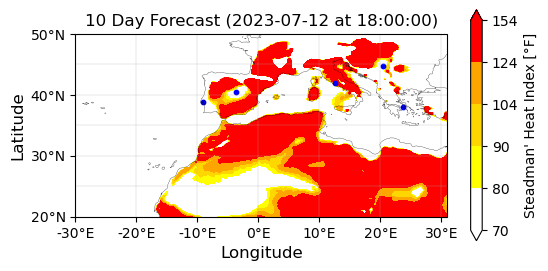

In [439]:
# Plot the estimated Heat Index 

#
colors = ['white', 'yellow', 'gold', 'orange', 'red']
bounds = [70, 80, 90, 104, 124, 154]
cmap = mcolors.ListedColormap(colors)

# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 31)
lat_range = slice(20, 51)
levels = np.arange(0, 500, 50)

HI = heat_index_estimated.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(HI, ax=ax, cmap=cmap, levels=bounds, cbar_kwargs={'label': "Steadman' Heat Index [°F]"})
# Add coastlines
    
ax.coastlines(linewidth=0.2)
# Draw gridlines but no labels (we will do that later using a for loop)
ax.gridlines(draw_labels=False, linewidth=0.2)
points = [(38.736946, -9.142685), (40.416775, -3.703790), (41.902782, 12.496366), (44.787197, 20.457273), (37.983810, 23.727539)]  
for lon, lat in points:
    ax.scatter(lat, lon, color='blue', marker='o', label='Points', s=10)

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 10))
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 10)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10))
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)
# we do not want any title because we will be using captions in the report
ax.set_title('10 Day Forecast (2023-07-12 at 18:00:00)')

# Save the plot as a PDF file
plt.savefig('../analysis/Heat_Index/Pangu10_heat_index.pdf')

# Show the plot
plt.show()

## Pangu: Geopotential Height at 18.00 (Absolute Values)

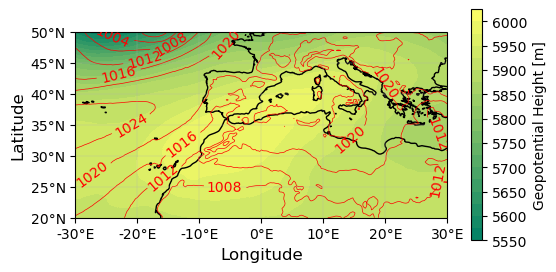

In [440]:
# Define the area of interest and the levels of the color bar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5550, 6050, 25)

# Read the geopotential height at 500hPa at a specific date
# Convert all values from geopotential into geopotential height, choose a date and an area of interest
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step='2023-07-12T18:00:00', lon=lon_range) / 9.81
# remove "#" to use this line --> Reference for the geopotential height at 500hPa at Midnight
#Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00', lon = lon_range)/9.81

# Extract surface mean pressure
surface_pressure = Pangu_data_20230702.msl.sel(step='2023-07-12T18:00:00', lon=lon_range) / 100

# Plot the geopotential height at 500hPa for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contourf to plot geopotential height
xplot = ax.contourf(Pangu_z.lon, Pangu_z.lat, Pangu_z, cmap='summer', levels=levels)

# Add a colorbar
cbar = fig.colorbar(xplot, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Geopotential Height [m]')

# Contour mean sea level pressure with red lines and labels
contour = ax.contour(surface_pressure.lon, surface_pressure.lat, surface_pressure, colors='red', linewidths=0.5)
plt.clabel(contour, inline=True, fmt='%1.0f')  # Add labels to the contour lines

# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/Geopotential Height/ERA_z_noon.pdf')

# Show the plot
plt.show()

## Geopotential Height Anomalies at 18:00

### 10 Days Forecast Anomaly at 18.00

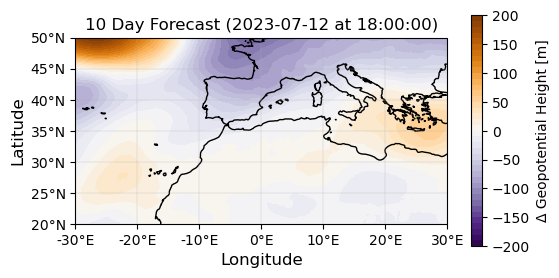

In [441]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-200, 201, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-12T18:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step='2023-07-12T18:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('10 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Geopotential Height/Pangu10_1800.pdf')


# Show the plot
plt.show()

### 5 Days Forecast Anomaly at 18.00

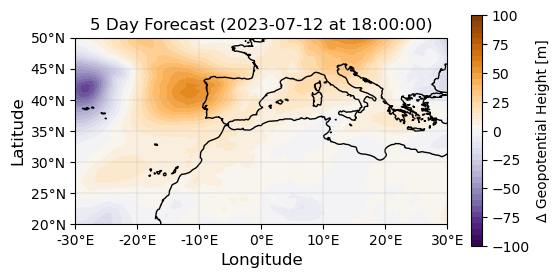

In [442]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-100, 101, 5)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-12T18:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step='2023-07-12T18:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('5 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Geopotential Height/Pangu05_1800.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly at 18.00

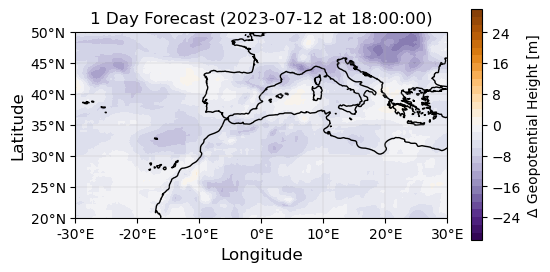

In [443]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-30, 31, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-12T18:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step='2023-07-12T18:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('1 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Geopotential Height/Pangu01_1800.pdf')

# Show the plot
plt.show()

### 10 Days Forecast Anomaly at 06.00

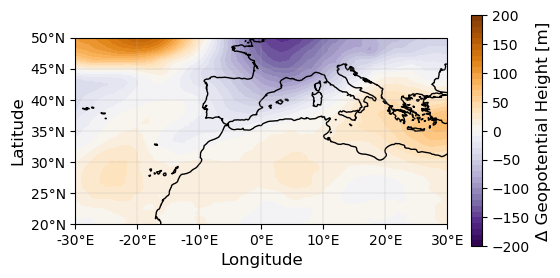

In [444]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-200, 201, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-13T06:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step='2023-07-13T06:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

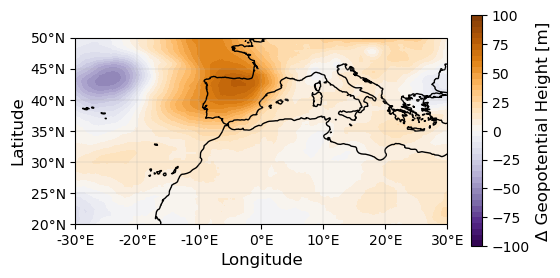

In [445]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-100, 101, 5)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-13T06:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step='2023-07-13T06:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

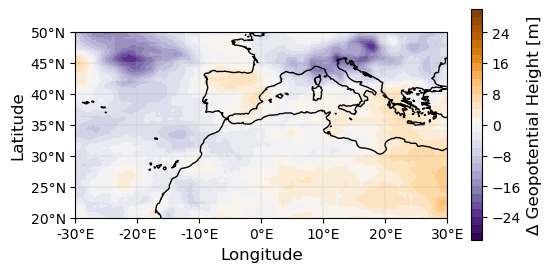

In [446]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-30, 31, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level=500, time='2023-07-13T06:00:00') / 9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step='2023-07-13T06:00:00') / 9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap=cm.PuOr.reversed(), levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 Geopotential Height [m]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## Pangu: 2 Meter Air Temperature at 18.00 (Absolute Values)

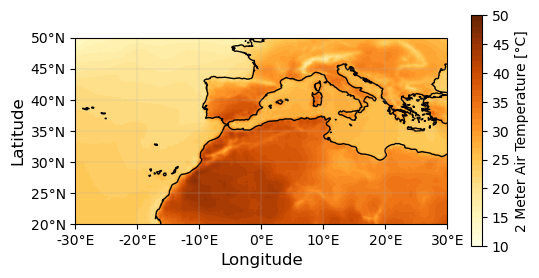

In [447]:
# Define the area of interest and the levels of the color bar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(10, 51, 1)

# Read the geopotential height at 500hPa at a specific date
# Convert all values from geopotential into geopotential height, choose a date and an area of interest
Pangu_z = Pangu_data_20230702.t2.sel(step='2023-07-12T12:00:00', lon=lon_range)-273.15
# remove "#" to use this line --> Reference for the geopotential height at 500hPa at Midnight
#Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00', lon = lon_range)/9.81

# Plot the geopotential height at 500hPa for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contourf to plot geopotential height
xplot = ax.contourf(Pangu_z.lon, Pangu_z.lat, Pangu_z, cmap='YlOrBr', levels=levels)

# Add a colorbar
cbar = fig.colorbar(xplot, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('2 Meter Air Temperature [°C]')

# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Show the plot
plt.show()

## 2 Meter Air Temperature Anomalies at 18.00

### 10 Day Forecast at 18.00

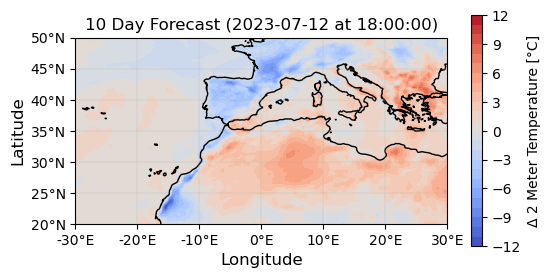

In [448]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-12, 13, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-12T18:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.t2.sel(step='2023-07-12T18:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('10 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Temperature/Pangu10_1800.pdf')

# Show the plot
plt.show()

### 5 Days Forescast Anomaly at 18.00

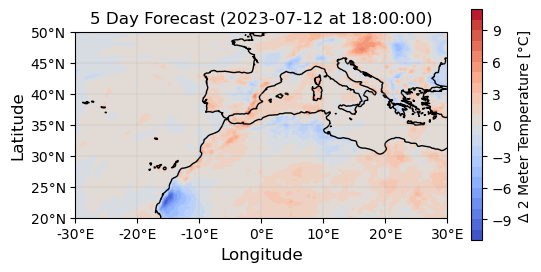

In [449]:
# 5 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-11, 12, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-12T18:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.t2.sel(step='2023-07-12T18:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('5 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Temperature/Pangu05_1800.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly at 18.00

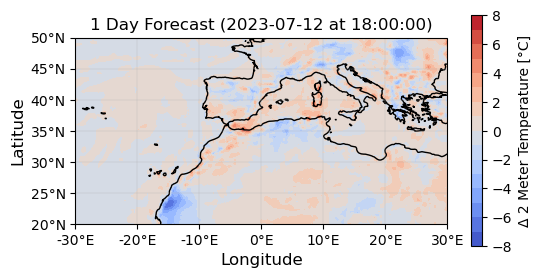

In [450]:
# 1 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-8, 9, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-12T18:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.t2.sel(step='2023-07-12T18:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title('1 Day Forecast (2023-07-12 at 18:00:00)')

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=10)

# Save the plot as a PDF file
plt.savefig('../analysis/Anomalies/Temperature/Pangu01_1800.pdf')

# Show the plot
plt.show()

## 2 Meter Air Temperature Anomalies at 06.00

### 10 Days Forecast Anomaly at 06.00

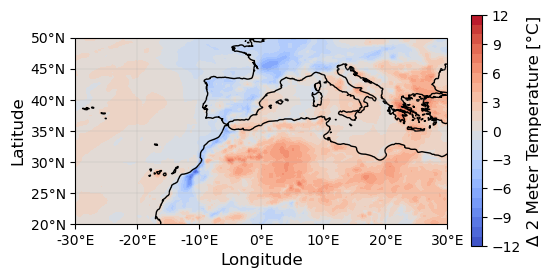

In [451]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-12, 13, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-13T06:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.t2.sel(step='2023-07-13T06:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/Temperature/Pangu_10.midnight.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly at 06.00

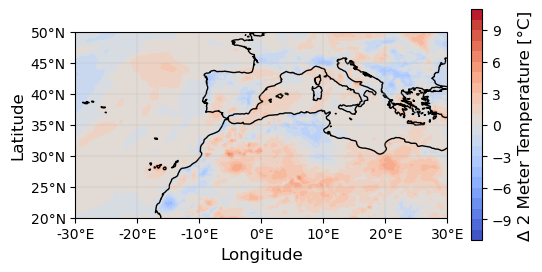

In [452]:
# 5 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-11, 12, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-13T06:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.t2.sel(step='2023-07-13T06:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/Temperature/Pangu_5.midnight.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly at 06.00

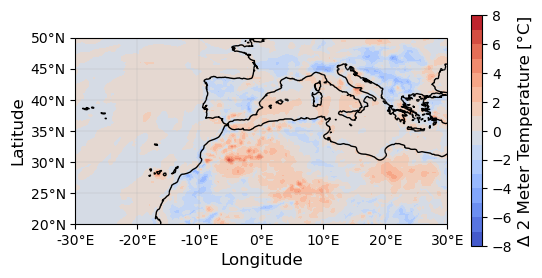

In [453]:
# 1 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-8, 9, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['t2m'].sel(time='2023-07-13T06:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.t2.sel(step='2023-07-13T06:00:00')-273.15

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
contour_plot = ax.contourf(z_anomaly.lon, z_anomaly.lat, z_anomaly, cmap='coolwarm', levels=levels)
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False, linewidth = 0.2)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical')
cbar.set_label('\u0394 2 Meter Temperature [°C]', fontsize=12)

# Save the plot as a PDF file
#plt.savefig('../analysis/Temperature/Pangu_1.midnight.pdf')

# Show the plot
plt.show()

# Pangu-Weather Wind Analysis

In [454]:
## compute surface wind speed from u and v
Pangu_data_20230702 = Pangu_data_20230702.assign(wind_speed = lambda Pangu_data_20230702: (Pangu_data_20230702.u**2 + Pangu_data_20230702.v**2)**0.5 )
Pangu_data_20230707 = Pangu_data_20230707.assign(wind_speed = lambda Pangu_data_20230707: (Pangu_data_20230707.u**2 + Pangu_data_20230707.v**2)**0.5 )
Pangu_data_20230711 = Pangu_data_20230711.assign(wind_speed = lambda Pangu_data_20230711: (Pangu_data_20230711.u**2 + Pangu_data_20230711.v**2)**0.5 )

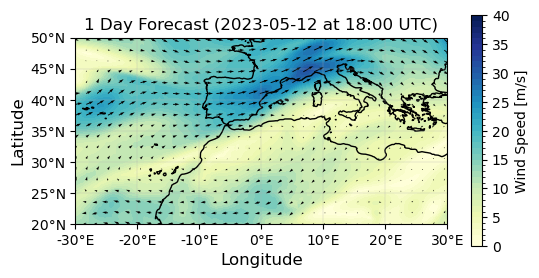

In [455]:
map_projection = ccrs.PlateCarree()

# Define the area of interest and levels for wind speed
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
V_levels = np.arange(0, 41, 1)

# Create a figure and axis with the specified projection
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=map_projection)

# Plotting wind speed contours
#Pangu_data_20230702.wind_speed.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500).squeeze().plot.contourf(
#    ax=ax, transform=map_projection, levels=V_levels, vmin=0, vmax=41,
#    cmap='YlGnBu', cbar_kwargs=dict(label='Wind Speed [m/s]'))

#Pangu_data_20230707.wind_speed.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500).squeeze().plot.contourf(
#    ax=ax, transform=map_projection, levels=V_levels, vmin=0, vmax=41,
#    cmap='YlGnBu', cbar_kwargs=dict(label='Wind Speed [m/s]'))

Pangu_data_20230711.wind_speed.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500).squeeze().plot.contourf(
    ax=ax, transform=map_projection, levels=V_levels, vmin=0, vmax=41,
    cmap='YlGnBu', cbar_kwargs=dict(label='Wind Speed [m/s]'))

# Reduce the density of wind vectors by selecting every nth point
n = 7  # Adjust this value as needed
#wind_data = Pangu_data_20230702.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500)
#wind_data = Pangu_data_20230707.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500)
wind_data = Pangu_data_20230711.sel(step='2023-07-12T18:00:00', lon=lon_range, lat=lat_range, isobaricInhPa=500)
u = wind_data['u'][::n, ::n]
v = wind_data['v'][::n, ::n]
lon = wind_data['lon'][::n]
lat = wind_data['lat'][::n]

# Plotting wind vectors
ax.quiver(lon, lat, u, v, transform=map_projection, scale=1000)  # Adjust the scale as needed

# Add coastlines and gridlines
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.gridlines(draw_labels=False, linewidth=0.2)

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)

# Setting the title
#valid_time = '2023-07-12 at 18:00:00 UTC'
#ax.set_title('')  # to suppress xarray auto-title
#ax.set_title(f'Valid time: {valid_time}', loc='right')
#ax.set_title('ERA5 500 hPa wind', loc='left')
ax.set_title('1 Day Forecast (2023-05-12 at 18:00 UTC)')
# Save the plot as a PDF file
plt.savefig('../analysis/Absolute_Values/Wind/Pangu01_wind500.pdf')

# Show the plot
plt.show()

# Further Analyisis

## Scatter- and Lineplots

### Southern Europe

In [456]:
# Function to investigate the absolute values of the 2 meter temperature at a specific area
def plot_area_temperature_absolute(lat_1, lat_2, lon_1, lon_2, area_name):
    # Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
    latitude = slice(lat_1,lat_2)
    longitude = slice(lon_1, lon_2)

    t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
    mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
    time_index = t2m_area.time.to_pandas()
    temperature_values = mean_temperature_time.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
    t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_02 = mean_temperature_time_P2.values
    time_index_Pangu_02 = t2_area_02.step.to_pandas()

    t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_07 = mean_temperature_time_P7.values
    time_index_Pangu_07 = t2_area_07.step.to_pandas()

    t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_11 = mean_temperature_time_P11.values
    time_index_Pangu_11 = t2_area_11.step.to_pandas()

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_index, temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
    plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.axvline(pd.Timestamp('2023-07-11T12:00:00'), color='magenta', linestyle='--', label='Startingg Date: 1 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-11T12:00:00'), 24, '1 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.axvline(pd.Timestamp('2023-07-07T12:00:00'), color='orange', linestyle='--', label='Startingg Date: 5 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-07T12:00:00'), 24, '5 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.axvline(pd.Timestamp('2023-07-02T12:00:00'), color='red', linestyle='--', label='Startingg Date: 10 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-02T12:00:00'), 24, '10 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature (absolute values) for {area_name}')
    plt.show()
    return

In [457]:
# Function to investigate the absolute values of the 2 meter temperature (zoomed in) at a specific area
def plot_area_zoom_temperature_absolute(lat_1, lat_2, lon_1, lon_2, area_name):
    # Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
    latitude = slice(lat_1,lat_2)
    longitude = slice(lon_1, lon_2)

    t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
    mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
    time_index = t2m_area.time.to_pandas()
    temperature_values = mean_temperature_time.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
    t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_02 = mean_temperature_time_P2.values
    time_index_Pangu_02 = t2_area_02.step.to_pandas()

    t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_07 = mean_temperature_time_P7.values
    time_index_Pangu_07 = t2_area_07.step.to_pandas()

    t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_11 = mean_temperature_time_P11.values
    time_index_Pangu_11 = t2_area_11.step.to_pandas()

    # Filter the temperature values for a specific time range
    start_time = pd.Timestamp('2023-07-11T18:00:00')
    end_time = pd.Timestamp('2023-07-15T12:00:00')
    time_mask = (time_index >= start_time) & (time_index <= end_time)
    filtered_temperature_values = temperature_values[time_mask]
    filtered_time_index = time_index[time_mask]

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_time_index, filtered_temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
    plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature (absolute values) for {area_name}')
    plt.show()
    return

In [458]:
# Function to investigate the 2 meter temperature anomaly at a specific area
def plot_area_temperature_anomly(lat_1, lat_2, lon_1, lon_2, area_name):
    # Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
    latitude = slice(lat_1,lat_2)
    longitude = slice(lon_1, lon_2)

    t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
    mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
    time_index = t2m_area.time.to_pandas()
    temperature_values = mean_temperature_time.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
    t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_02 = mean_temperature_time_P2.values
    time_index_Pangu_02 = t2_area_02.step.to_pandas()

    t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_07 = mean_temperature_time_P7.values
    time_index_Pangu_07 = t2_area_07.step.to_pandas()

    t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
    mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
    temperature_values_Pangu_11 = mean_temperature_time_P11.values
    time_index_Pangu_11 = t2_area_11.step.to_pandas()

    # Filter the temperature values for a specific time range
    start_time = pd.Timestamp('2023-07-12T12:00:00')
    end_time = pd.Timestamp('2023-07-15T00:00:00')
    time_mask = (time_index >= start_time) & (time_index <= end_time)
    # Filter the temperature values for a specific time range
    time_mask_P2 = (time_index_Pangu_02 >= start_time) & (time_index_Pangu_02 <= end_time)
    filtered_time_index_P2 = time_index_Pangu_02[time_mask_P2]
    time_mask_P7 = (time_index_Pangu_07 >= start_time) & (time_index_Pangu_07 <= end_time)
    filtered_time_index_P7 = time_index_Pangu_07[time_mask_P7]
    time_mask_P11 = (time_index_Pangu_11 >= start_time) & (time_index_Pangu_11 <= end_time)
    filtered_time_index_P11 = time_index_Pangu_11[time_mask_P11]
    
    Pangu_02 = temperature_values[time_mask] - temperature_values_Pangu_02[time_mask_P2]
    Pangu_07 = temperature_values[time_mask] - temperature_values_Pangu_07[time_mask_P7]
    Pangu_11 = temperature_values[time_mask] - temperature_values_Pangu_11[time_mask_P11]

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_time_index_P2, Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(filtered_time_index_P7, Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(filtered_time_index_P11, Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.axhline(0, color='black', linestyle='-', label='ERA-5 Baseline', linewidth = 1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature (absolute values) for {area_name}')

        # Create DataFrame
    dates = time_mask_P2[time_mask_P2].index
    dates_list = dates.tolist()

    df = pd.DataFrame()
    data = {
        'Time': dates_list,
        'Location': np.repeat(area_name, len(dates_list)),
        'Pangu 10 Day [°C]': Pangu_02,
        'Pangu 5 Day [°C]': Pangu_07,
        'Pangu 1 Day [°C]': Pangu_11,
        'ERA-5 [°C]': temperature_values[time_mask]
    }
    df = df.assign(**data)
    file_path = os.path.join('../analysis/Areas', f'{area_name}.csv')
    df.to_csv(file_path)

    df_1 = df.describe()
    file_path_stat = os.path.join('../analysis/Areas', f'{area_name}_stat.csv')
    df_1.to_csv(file_path_stat)
    # Storing plot and DataFrame in a list and returning
    result = [plt, df, df_1]
    return result

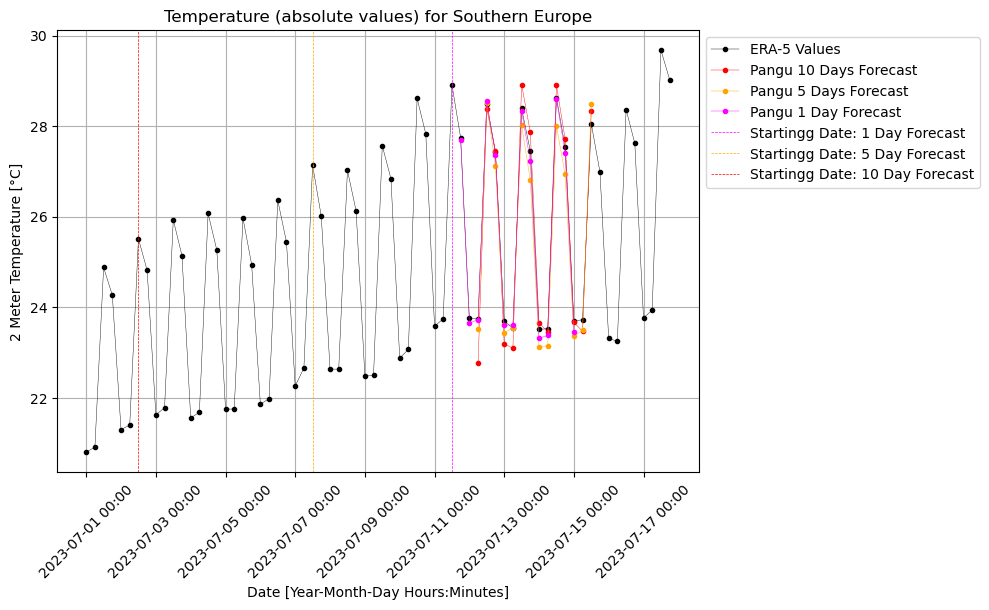

In [459]:
# Function call plot_area_temperature_absolute(lat_1, lat_2, lon_1, lon_2, "area_name")
plot_area_temperature_absolute(35, 45, -10, 25, "Southern Europe")

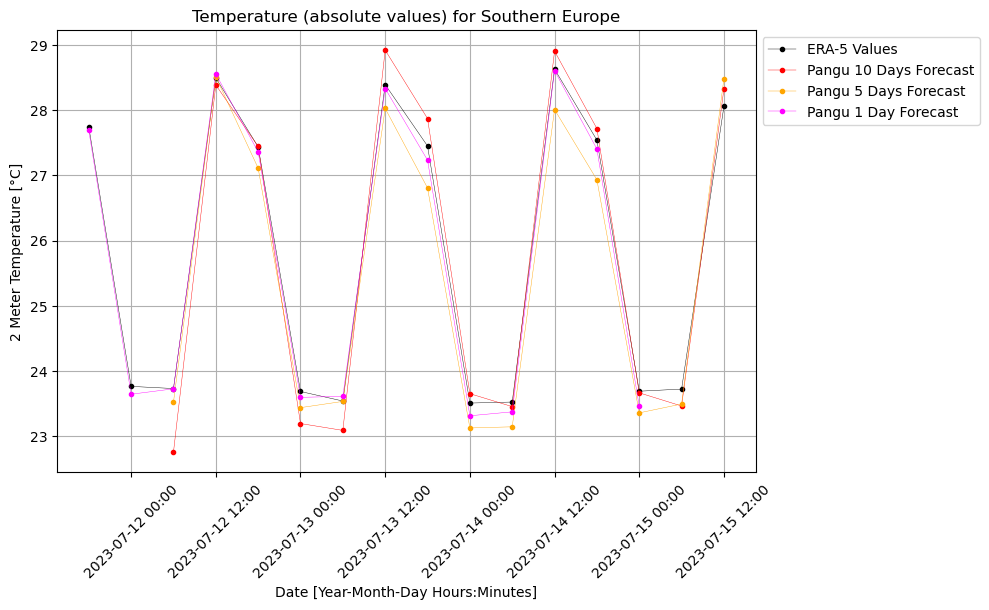

In [460]:
# Function call plot_area_zoom_temperature_absolute(lat_1, Lat_2, lon_1, lon_2, "area_name")
plot_area_zoom_temperature_absolute(35, 45, -10, 25, "Southern Europe")

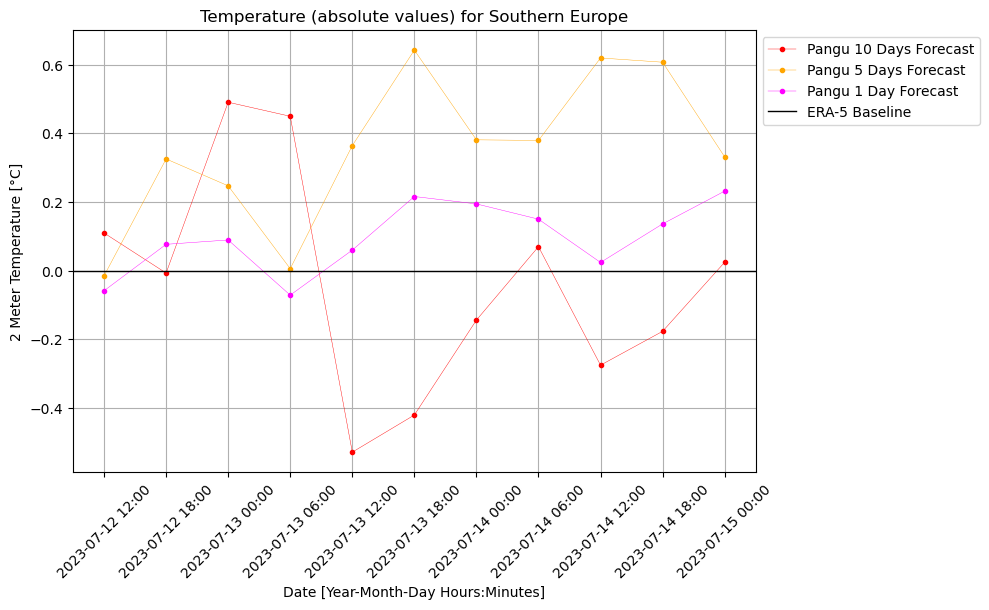

In [461]:
# Function call plot_area_temperature_anomly(lat_1, Lat_2, lon_1, lon_2, "area_name")
results = plot_area_temperature_anomly(35, 45, -10, 25, "Southern Europe")

In [462]:
print(results[2])

                      Time  Pangu 10 Day [°C]  Pangu 5 Day [°C]  \
count                   11          11.000000         11.000000   
mean   2023-07-13 18:00:00          -0.036954          0.353854   
min    2023-07-12 12:00:00          -0.528856         -0.014925   
25%    2023-07-13 03:00:00          -0.226014          0.286544   
50%    2023-07-13 18:00:00          -0.006844          0.364624   
75%    2023-07-14 09:00:00           0.089989          0.494588   
max    2023-07-15 00:00:00           0.491076          0.642973   
std                    NaN           0.321047          0.221386   

       Pangu 1 Day [°C]  ERA-5 [°C]  
count         11.000000   11.000000  
mean           0.095503   25.989693  
min           -0.071177   23.509586  
25%            0.042064   23.613846  
50%            0.089567   27.434841  
75%            0.172461   27.964161  
max            0.231941   28.626995  
std            0.102918    2.332562  


### Cities

In [463]:
# Function to investigate the absolute values of the 2 meter temperature at a specific location
def plot_temperature_absolute(lat, lon, location_name):
    # Overview about Rome
    # Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
    latitude = 41.902782
    longitude = 12.496366

    t2m_city = ERA_data['t2m'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15 
    time_index = t2m_city.time.to_pandas()
    temperature_values = t2m_city.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
    t2_city_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
    time_index_Pangu_02 = t2_city_02.step.to_pandas()
    temperature_values_Pangu_02 = t2_city_02.values

    t2_city_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
    time_index_Pangu_07 = t2_city_07.step.to_pandas()
    temperature_values_Pangu_07 = t2_city_07.values

    t2_city_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
    time_index_Pangu_11 = t2_city_11.step.to_pandas()
    temperature_values_Pangu_11 = t2_city_11.values

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_index, temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
    plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.axvline(pd.Timestamp('2023-07-11T12:00:00'), color='magenta', linestyle='--', label='Starting Date: 1 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-11T12:00:00'), 24, '1 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.axvline(pd.Timestamp('2023-07-07T12:00:00'), color='orange', linestyle='--', label='Starting Date: 5 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-07T12:00:00'), 24, '5 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.axvline(pd.Timestamp('2023-07-02T12:00:00'), color='red', linestyle='--', label='Starting Date: 10 Day Forecast', linewidth = 0.5)
    #plt.text(pd.Timestamp('2023-07-02T12:00:00'), 24, '10 Day Forecast', rotation=90, va='bottom', ha='right')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature (absolute values) for {location_name}')
    plt.show()
    return

In [464]:
# Function to investigate the absolute values of the 2 meter temperature (zoomed in) at a specific location
def plot_zoomed_temperature_absolute(lat, lon, location_name):
    # Zoom in for Rome
    # Coordinates Rome
    latitude = lat
    longitude = lon

    # Select the 2-meter temperature data (ERA-5) for the nearest coordinates of Rome
    t2m_city = ERA_data['t2m'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15 
    time_index = t2m_city.time.to_pandas()
    temperature_values = t2m_city.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
    t2_city_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude,method='nearest') - 273.15
    time_index_Pangu_02 = t2_city_02.step.to_pandas()
    temperature_values_Pangu_02 = t2_city_02.values

    t2_city_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
    time_index_Pangu_07 = t2_city_07.step.to_pandas()
    temperature_values_Pangu_07 = t2_city_07.values

    t2_city_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
    time_index_Pangu_11 = t2_city_11.step.to_pandas()
    temperature_values_Pangu_11 = t2_city_11.values

    # Filter the temperature values for a specific time range
    start_time = pd.Timestamp('2023-07-11T18:00:00')
    end_time = pd.Timestamp('2023-07-15T12:00:00')
    time_mask = (time_index >= start_time) & (time_index <= end_time)
    filtered_temperature_values = temperature_values[time_mask]

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_index[time_mask], filtered_temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.6, color='black', label='ERA-5 Values')
    plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature (absolute values) for {location_name}')
    plt.show()
    
    return 

In [465]:
# Function to investigate an anomaly of the 2 meter temperature at a specific location

def plot_temperature_anomalies(lat, lon, location_name):
    # Select the 2-meter temperature data (ERA-5) for the nearest coordinates of the specified location
    t2m_city = ERA_data['t2m'].sel(lon=lon, lat=lat, method='nearest') - 273.15 
    time_index = t2m_city.time.to_pandas()
    temperature_values = t2m_city.values

    # Select the 2-meter temperature data (Pangu) for the nearest coordinates of the specified location
    t2_city_02 = Pangu_data_20230702['t2'].sel(lon=lon, lat=lat,method='nearest') - 273.15
    time_index_Pangu_02 = t2_city_02.step.to_pandas()
    temperature_values_Pangu_02 = t2_city_02.values

    t2_city_07 = Pangu_data_20230707['t2'].sel(lon=lon, lat=lat, method='nearest') - 273.15
    time_index_Pangu_07 = t2_city_07.step.to_pandas()
    temperature_values_Pangu_07 = t2_city_07.values

    t2_city_11 = Pangu_data_20230711['t2'].sel(lon=lon, lat=lat, method='nearest') - 273.15
    time_index_Pangu_11 = t2_city_11.step.to_pandas()
    temperature_values_Pangu_11 = t2_city_11.values

    # Filter the temperature values for a specific time range
    start_time = pd.Timestamp('2023-07-12T12:00:00')
    end_time = pd.Timestamp('2023-07-15T00:00:00')
    time_mask = (time_index >= start_time) & (time_index <= end_time)
    # Filter the temperature values for a specific time range
    time_mask_P2 = (time_index_Pangu_02 >= start_time) & (time_index_Pangu_02 <= end_time)
    filtered_time_index_P2 = time_index_Pangu_02[time_mask_P2]
    time_mask_P7 = (time_index_Pangu_07 >= start_time) & (time_index_Pangu_07 <= end_time)
    filtered_time_index_P7 = time_index_Pangu_07[time_mask_P7]
    time_mask_P11 = (time_index_Pangu_11 >= start_time) & (time_index_Pangu_11 <= end_time)
    filtered_time_index_P11 = time_index_Pangu_11[time_mask_P11]

    Pangu_02 = temperature_values[time_mask] - temperature_values_Pangu_02[time_mask_P2]
    Pangu_07 = temperature_values[time_mask] - temperature_values_Pangu_07[time_mask_P7]
    Pangu_11 = temperature_values[time_mask] - temperature_values_Pangu_11[time_mask_P11]

    # Plot line plot with temperature values over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_time_index_P2, Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
    plt.plot(filtered_time_index_P7, Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
    plt.plot(filtered_time_index_P11, Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
    plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
    plt.ylabel('2 Meter Temperature [°C]')
    plt.xticks(rotation=45) 
    plt.grid(True)
    # Change labels in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.axhline(0, color='black', linestyle='-', label='ERA-5 Baseline', linewidth = 1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.title(f'Temperature Anomalies for {location_name}')

    # Create DataFrame
    dates = time_mask_P2[time_mask_P2].index
    dates_list = dates.tolist()

    df = pd.DataFrame()
    data = {
        'Time': dates_list,
        'Location': np.repeat(location_name, len(dates_list)),
        'Pangu 10 Day [°C]': Pangu_02,
        'Pangu 5 Day [°C]': Pangu_07,
        'Pangu 1 Day [°C]': Pangu_11,
        'ERA-5 [°C]': temperature_values[time_mask]
    }
    df = df.assign(**data)
    file_path = os.path.join('../analysis/Cities', f'{location_name}.csv')
    df.to_csv(file_path)

    df_1 = df.describe()
    file_path_stat = os.path.join('../analysis/Cities', f'{location_name}_stat.csv')
    df_1.to_csv(file_path_stat)
    
    # Storing plot and DataFrame in a list and returning
    result = [plt, df, df_1]
    return result

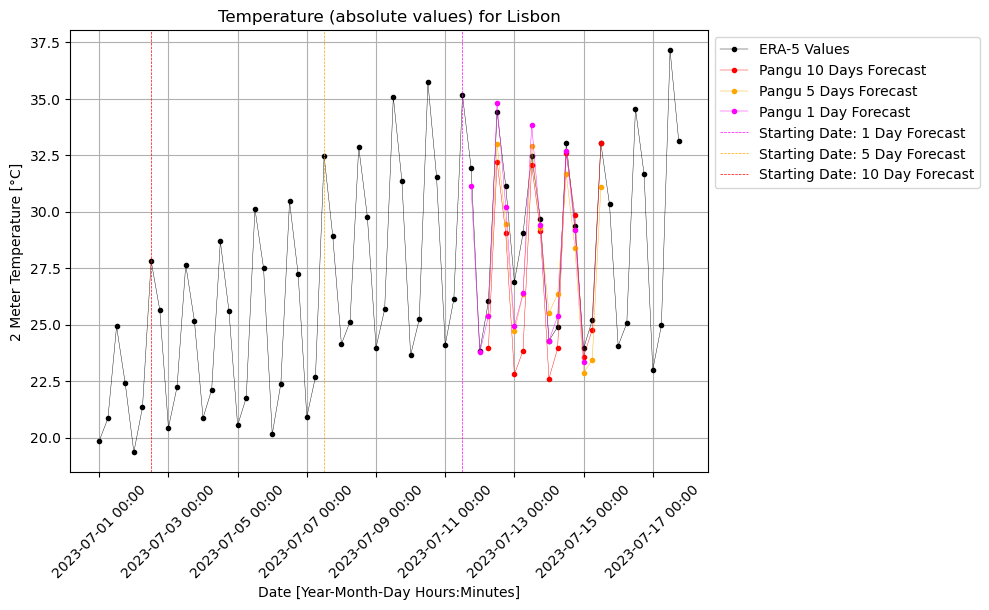

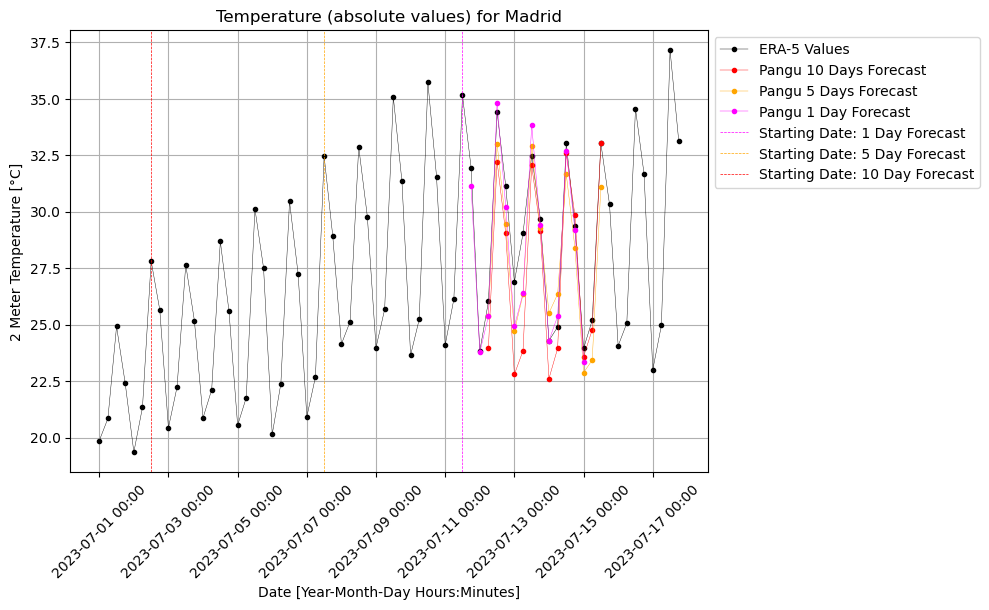

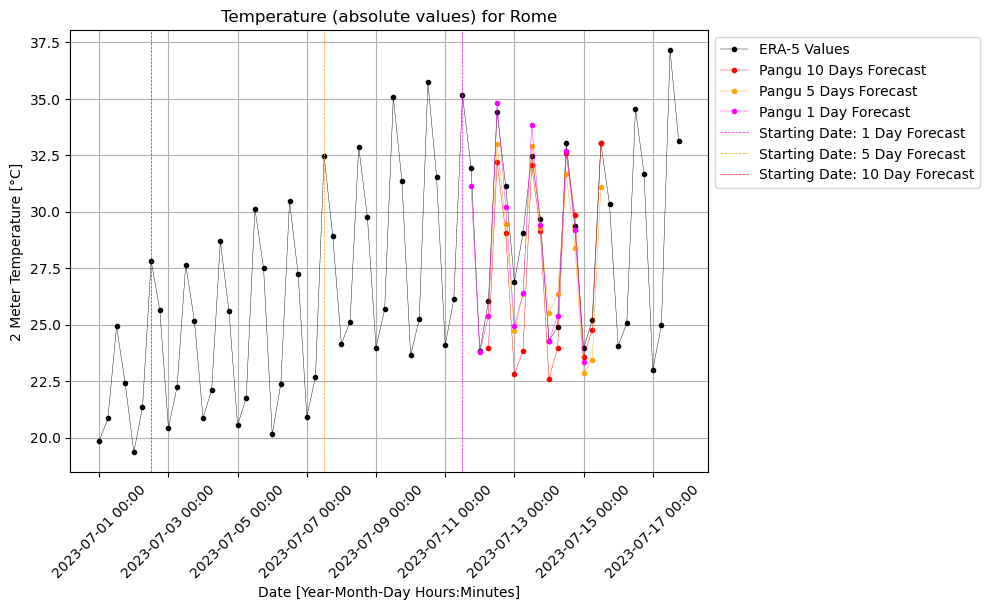

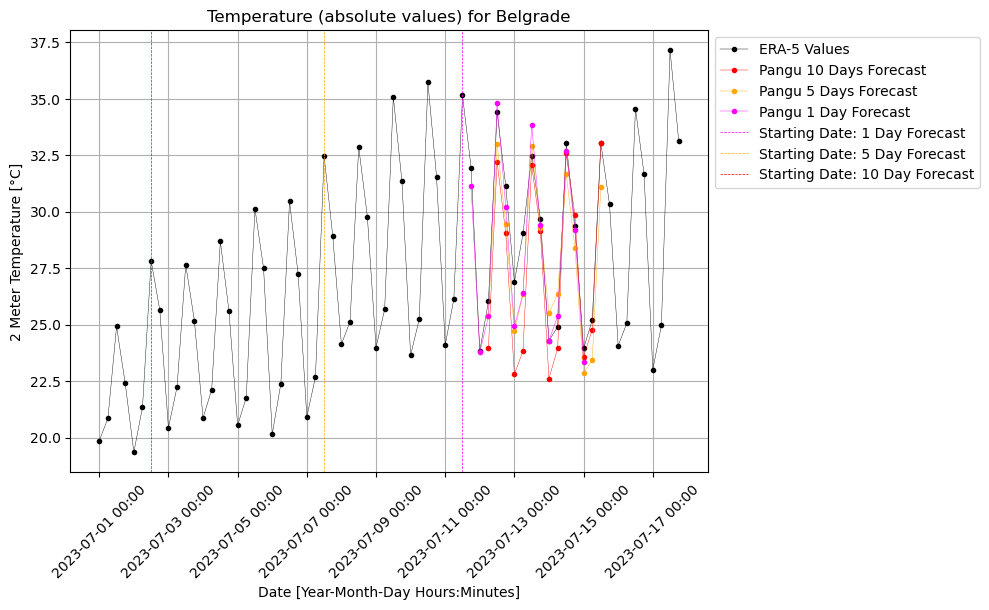

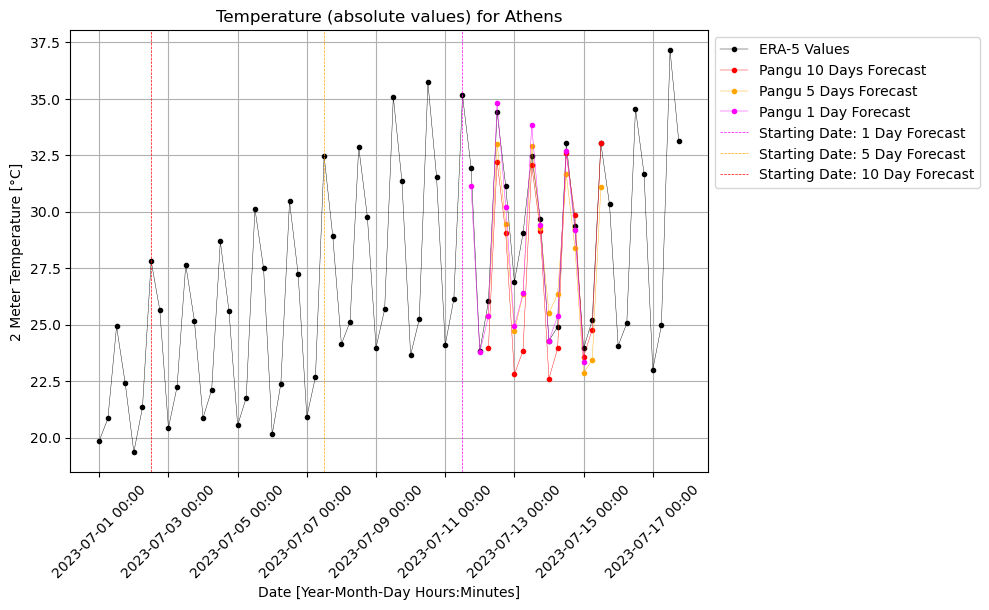

In [466]:
# Function call plot_temperature_absolute(lat, lon, location_name)
plot_temperature_absolute(38.736946, -9.142685, 'Lisbon')
plot_temperature_absolute(40.416775, -3.703790, 'Madrid')
plot_temperature_absolute(41.902782, 12.496366, 'Rome')
plot_temperature_absolute(44.787197, 20.457273, 'Belgrade')
plot_temperature_absolute(37.983810, 23.727539, 'Athens')

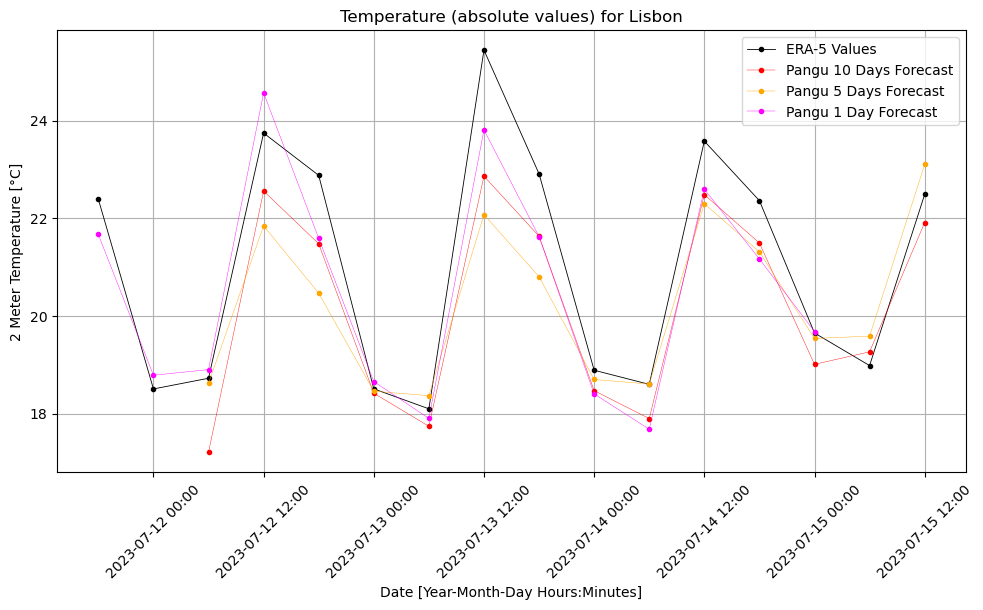

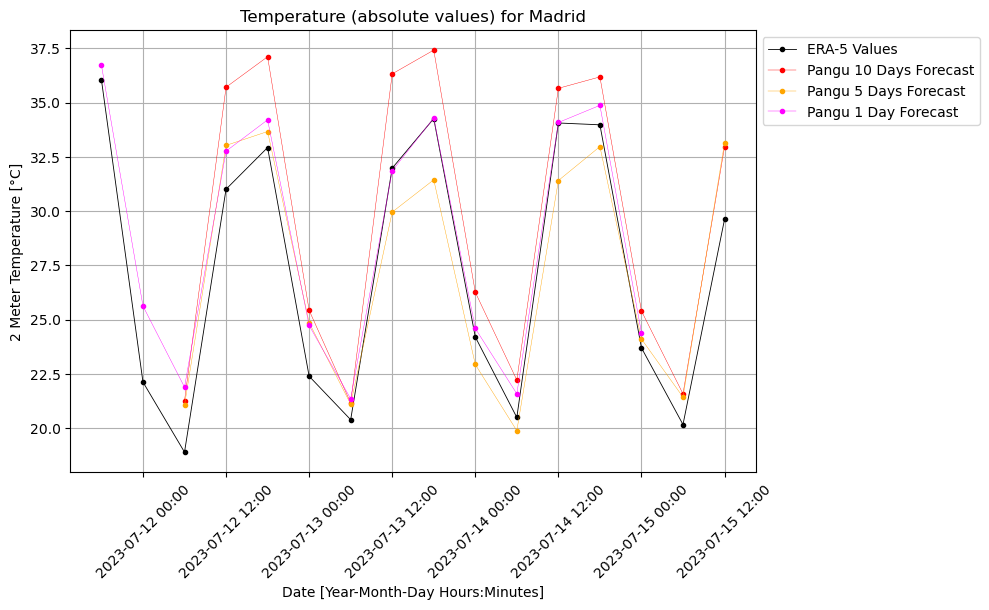

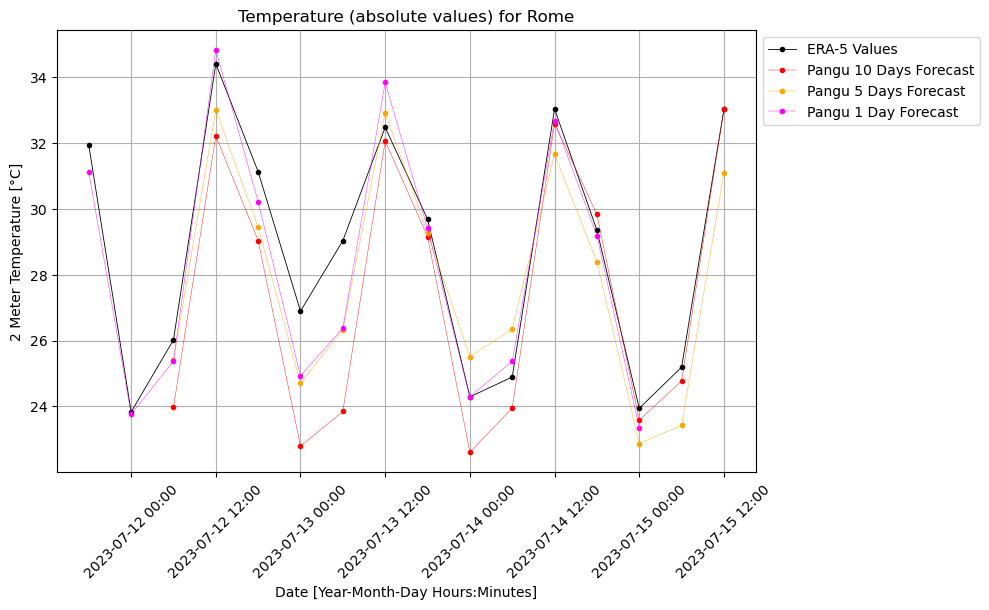

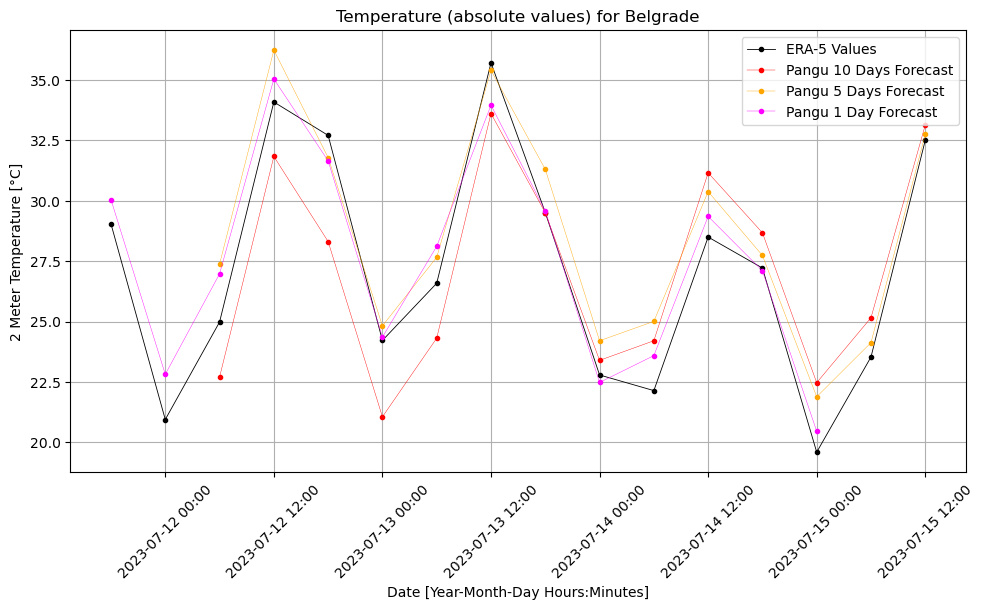

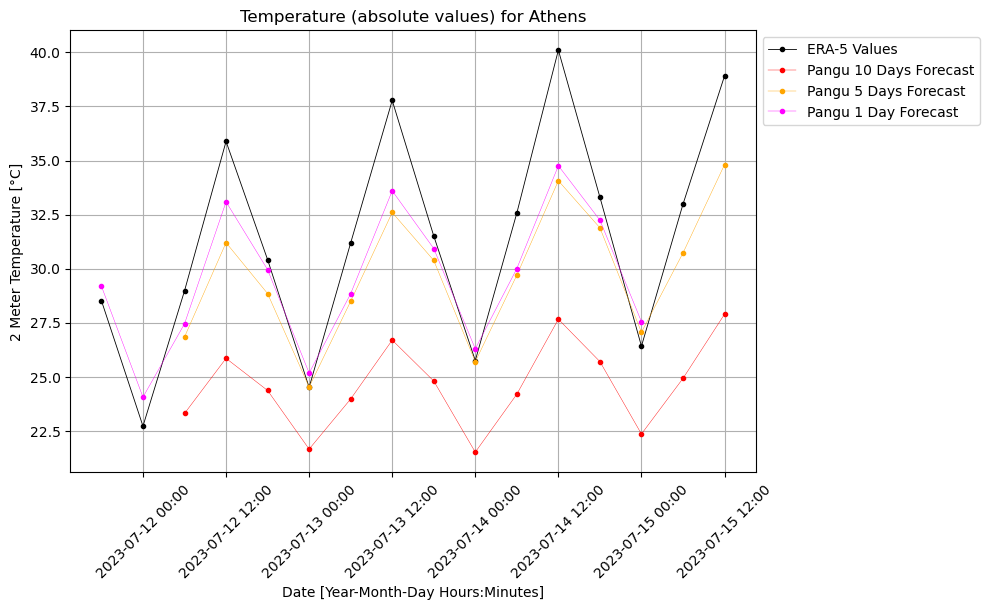

In [467]:
# Function call plot_zoomed_temperature_absolute(lat, lon, location_name)
plot_zoomed_temperature_absolute(38.736946, -9.142685, 'Lisbon')
plot_zoomed_temperature_absolute(40.416775, -3.703790, 'Madrid')
plot_zoomed_temperature_absolute(41.902782, 12.496366, 'Rome')
plot_zoomed_temperature_absolute(44.787197, 20.457273, 'Belgrade')
plot_zoomed_temperature_absolute(37.983810, 23.727539, 'Athens')

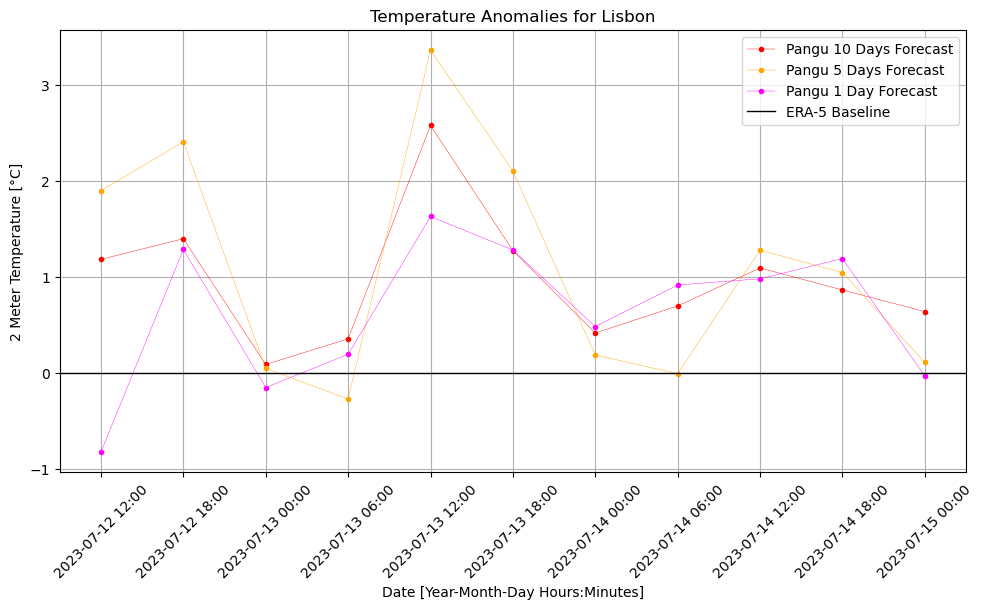

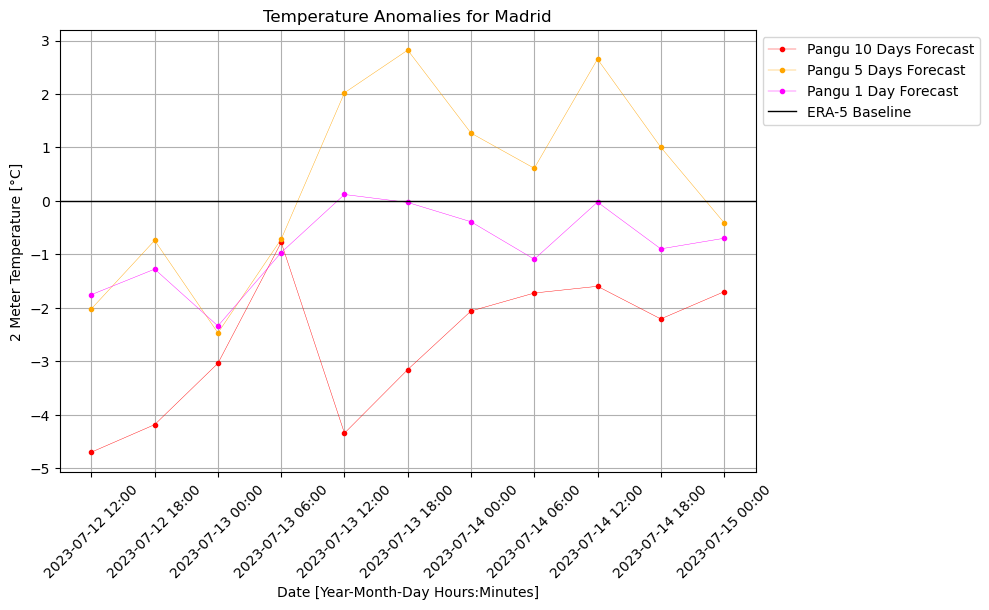

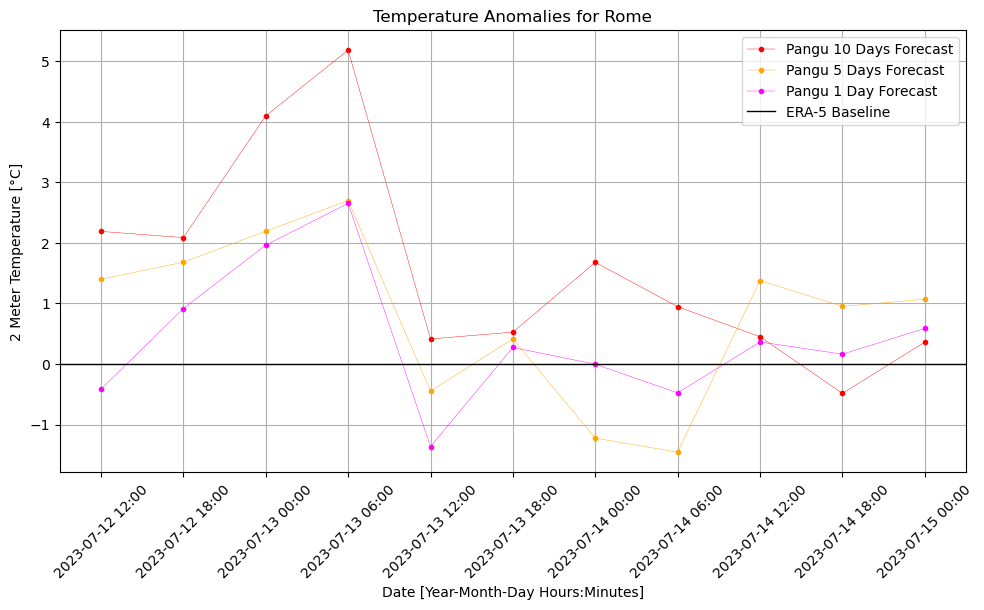

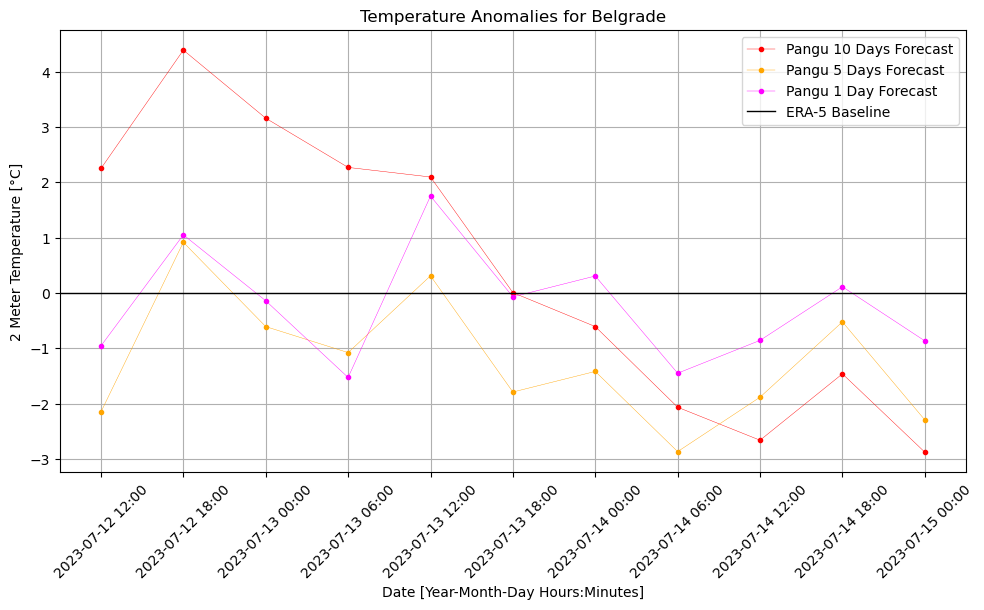

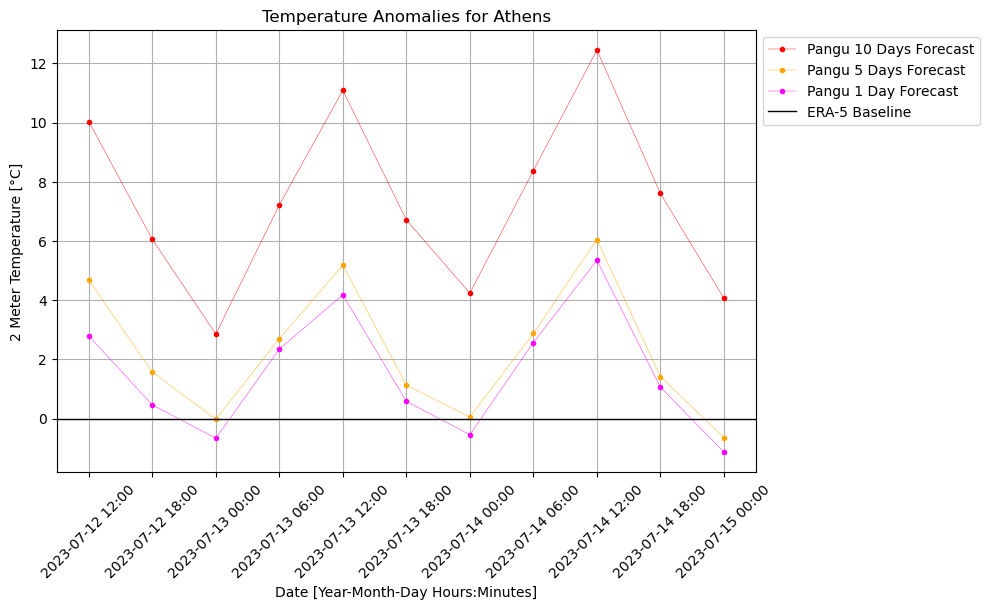

In [468]:
# Function call plot_temperature_anomalies(lat, lon, location_name)
Lisbon = plot_temperature_anomalies(38.736946, -9.142685, 'Lisbon')
Madrid = plot_temperature_anomalies(40.416775, -3.703790, 'Madrid')
Rome = plot_temperature_anomalies(41.902782, 12.496366, 'Rome')
Belgrade = plot_temperature_anomalies(44.787197, 20.457273, 'Belgrade')
Athens = plot_temperature_anomalies(37.983810, 23.727539, 'Athens')